# **ASSIGNMENT 17** #

## ***FOREST FIRES*** ##

File : forestfires.csv

In [691]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#from dataprep.eda import plot, create_report
import scipy.stats as stat
from collections import Counter
#import dataprep
from sklearn.svm import SVC
from sklearn import tree, preprocessing, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file forestfires.csv** ###

In [692]:
# Reading the data from the file 'forestfires.csv'
ff_orig_data = pd.read_csv('forestfires.csv')
ff_orig_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### **EDA (Exploratory Data Analysis)** ###

In [693]:
ff_orig_data.shape

(517, 31)

In [694]:
ff_orig_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


#### *Descriptive Analysis* ####

In [695]:
ff_orig_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [696]:
ff_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

#### *Checking for missing values* ####

In [697]:
# check for missing values
ff_orig_data.isna().sum() # The result shows that there are no missing values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### *Checking for Null Values* ####

In [698]:
# Checking to see if there are any null values
# We can get this information using ff_orig_data.info() option as well
ff_orig_data.isnull().sum() # The result shows that there are no null values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [699]:
# Checking for Duplicate Values
ff_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [700]:
# Count of duplicated rows
ff_orig_data[ff_orig_data.duplicated()].shape # We see that there are duplicates

(8, 31)

In [701]:
# Print the duplicated rows. Since we have duplicates it will show us the record
ff_orig_data[ff_orig_data.duplicated()] # There are duplicates

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [702]:
ff_orig_data.shape

(517, 31)

In [703]:
# Creating another DataFrame 'ff_data', which is a duplicate of ff_orig_data
ff_data = ff_orig_data.copy()

In [704]:
# Dropping the duplicates as well as resetting the index
ff_data = ff_data.drop_duplicates().reset_index(drop=True) # Removing the duplicates by retraining on the first record

In [705]:
ff_data.shape

(509, 31)

#### *Checking the data structure* ####

In [706]:
# Data Structure
print(type(ff_data))
ff_data.shape

<class 'pandas.core.frame.DataFrame'>


(509, 31)

In [707]:
# Checking data types
ff_data.dtypes # check data types of all variables

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [708]:
# Categorical features
# For columns in company_data.columns:
# If company_data[columns].dtypes == 'object' or company_data[columns].dtypes == 'category':
categorical_cols = []
for columns in ff_data:
        if ff_data[columns].dtypes == 'object':
                categorical_cols.append(columns)
print(f'There are {len(categorical_cols)} Numeric Columns: {categorical_cols}')

There are 3 Numeric Columns: ['month', 'day', 'size_category']


In [709]:
# Numerical features
import re

day_regex = "^day."
month_regex = "^month."

numerical_cols = []
for columns in ff_data:
    if ((ff_data[columns].dtypes != "object") and (not re.match(day_regex, columns)) and (not re.match(month_regex, columns))):
        numerical_cols.append(columns)

print(f'There are {len(numerical_cols)} Numeric Columns: {numerical_cols}')


There are 9 Numeric Columns: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [710]:
numeric_data = ff_data[numerical_cols]
numeric_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [711]:
categoric_data = ff_data[categorical_cols]
categoric_data

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small
...,...,...,...
504,aug,sun,large
505,aug,sun,large
506,aug,sun,large
507,aug,sat,small


#### **Visualizations** ####

#### ***Numerical Features*** ####

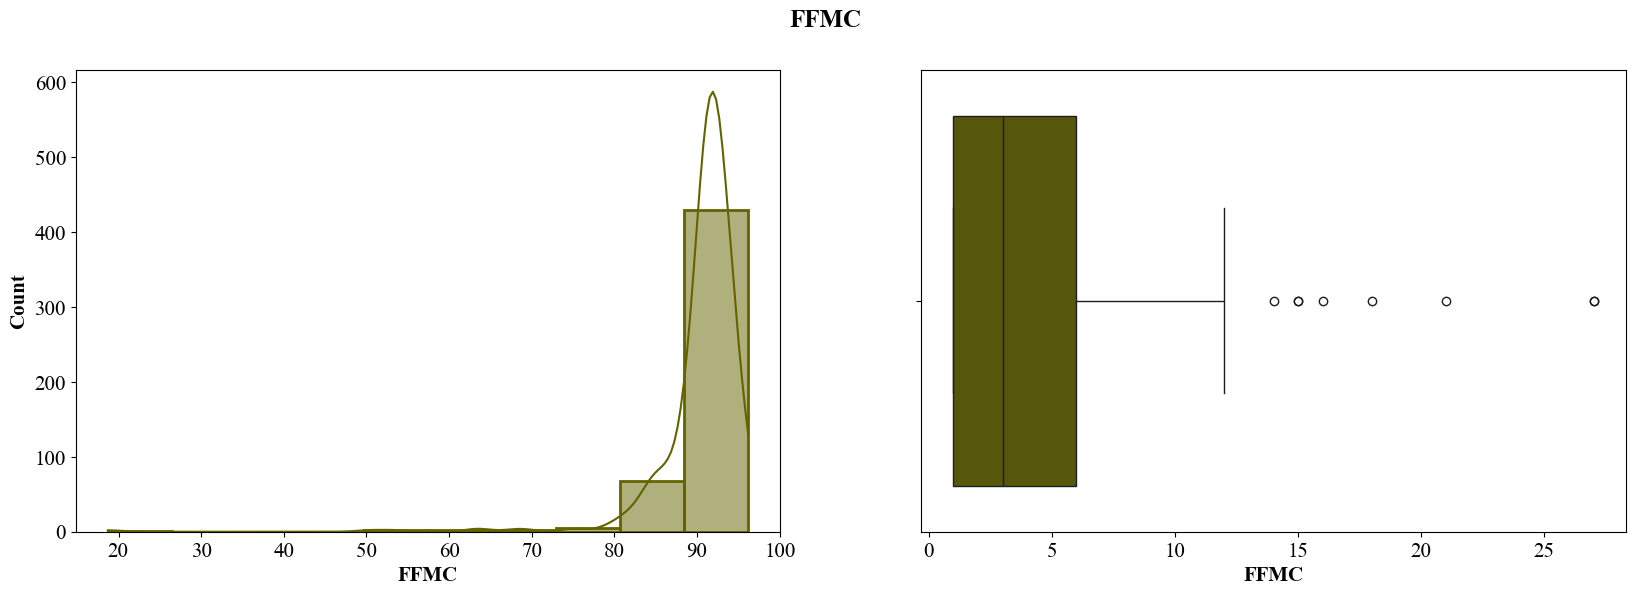

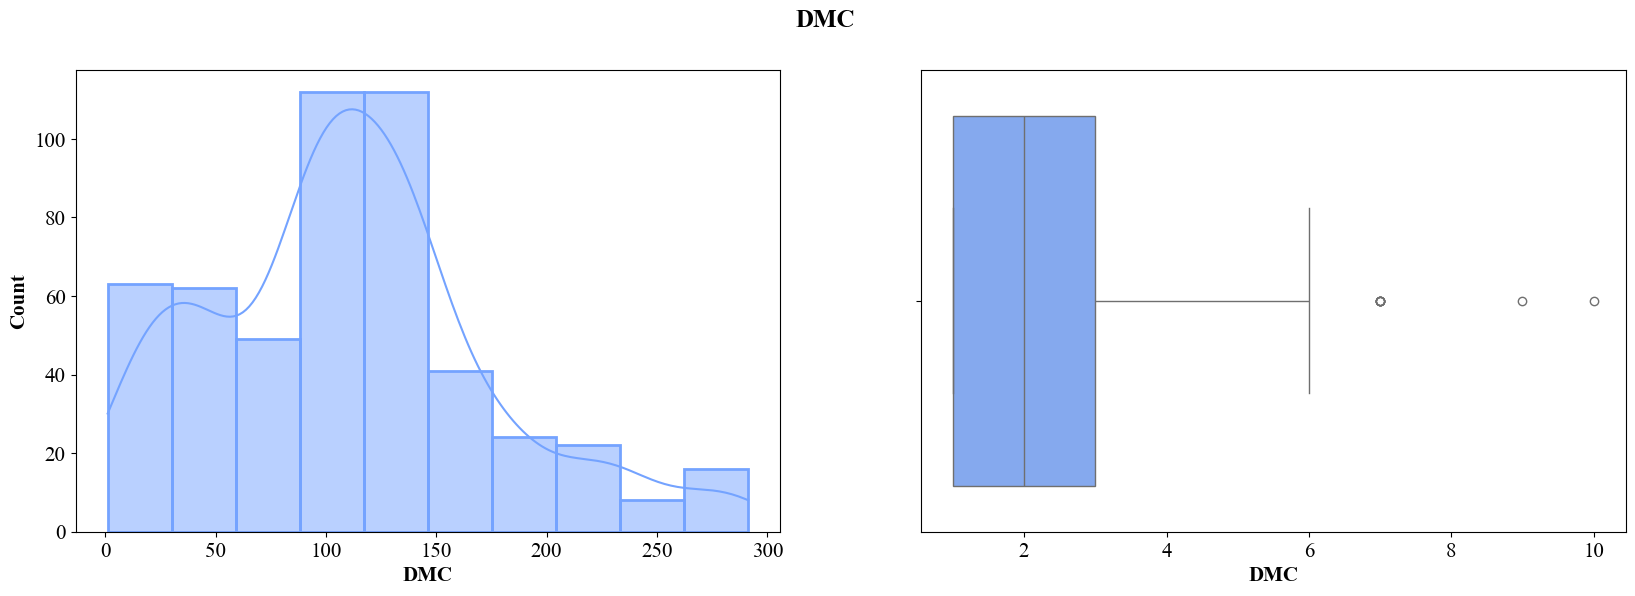

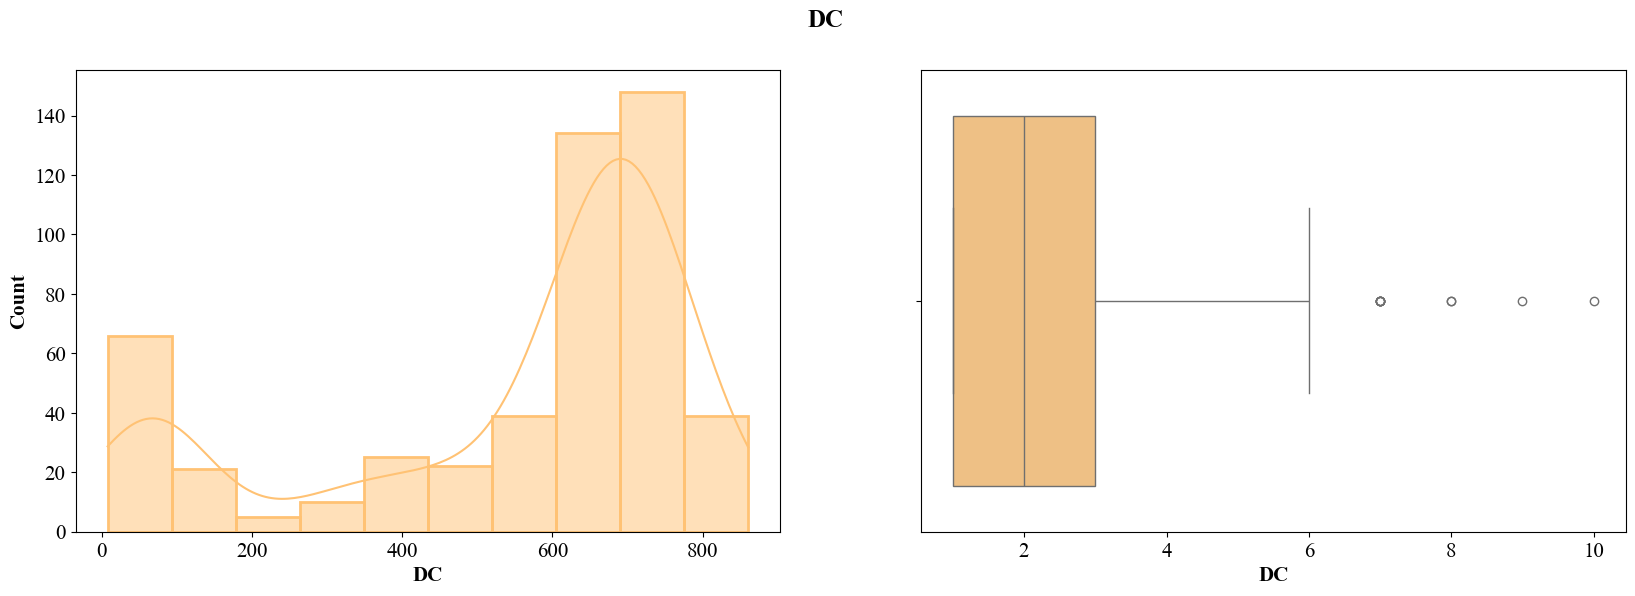

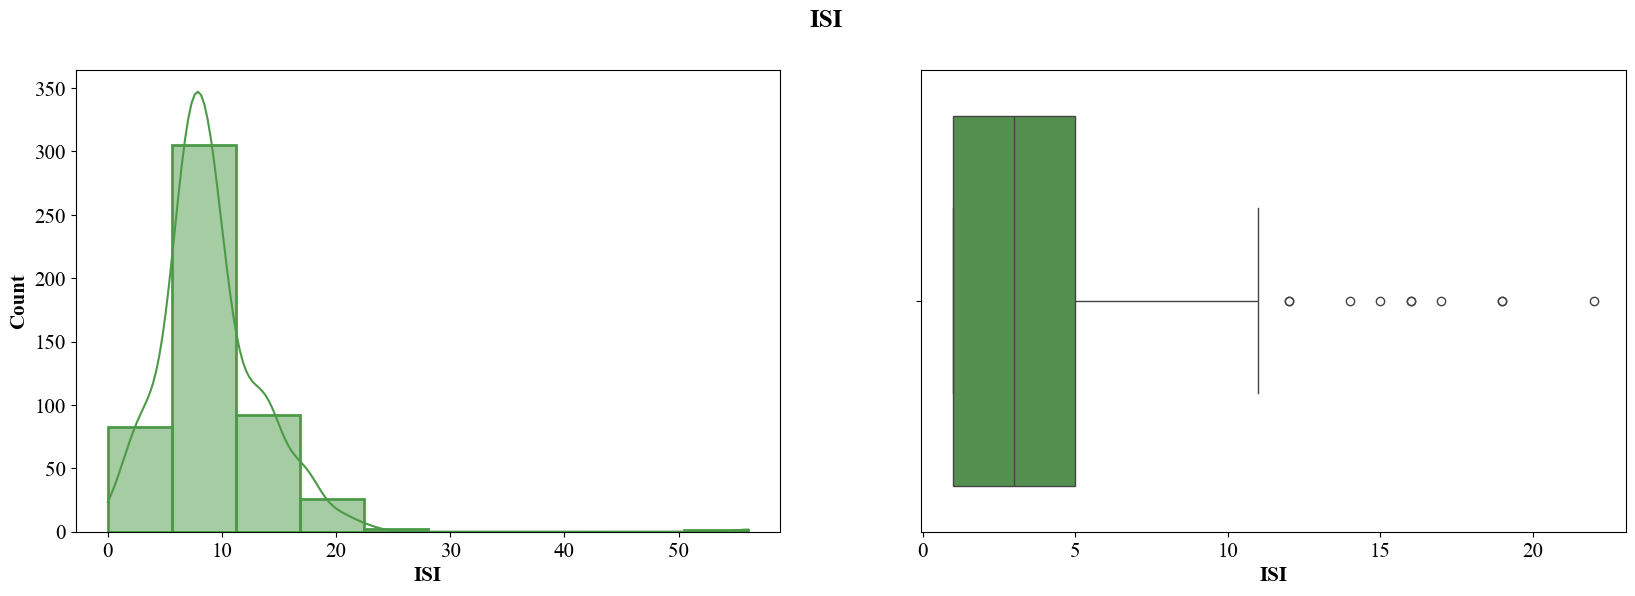

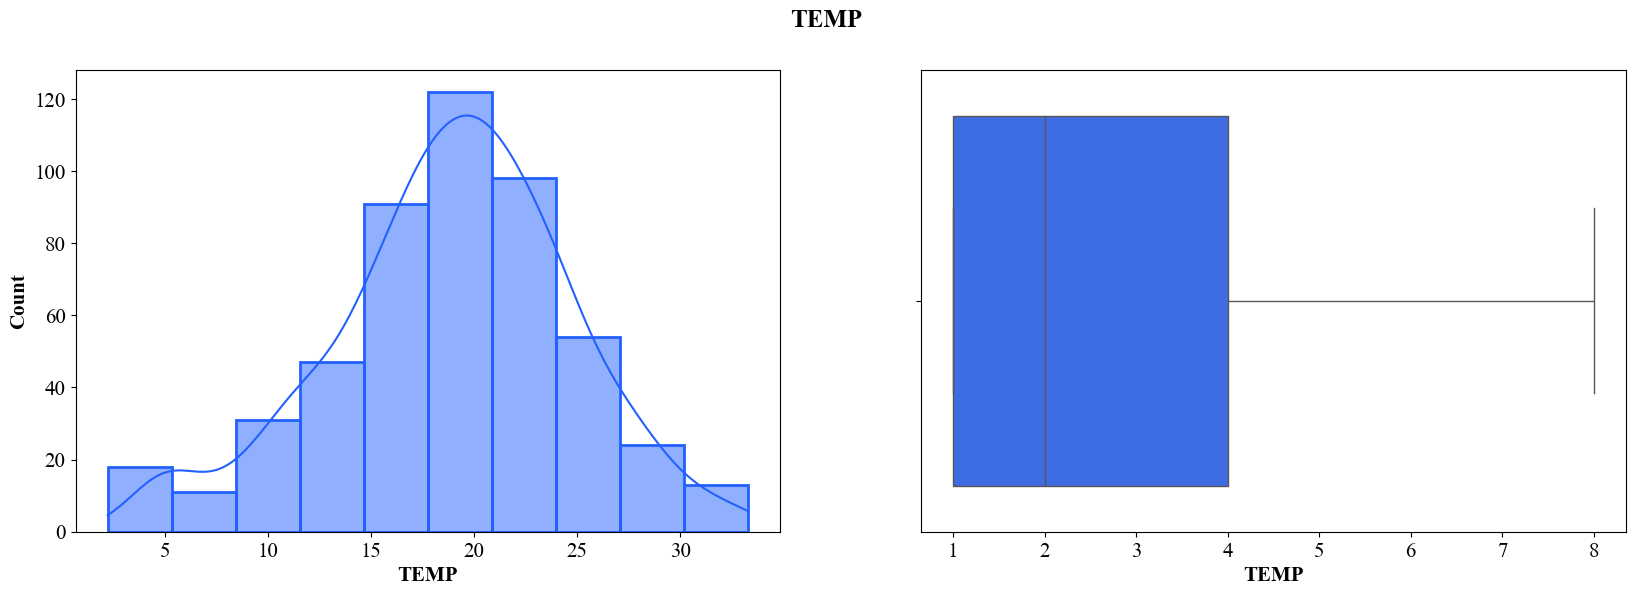

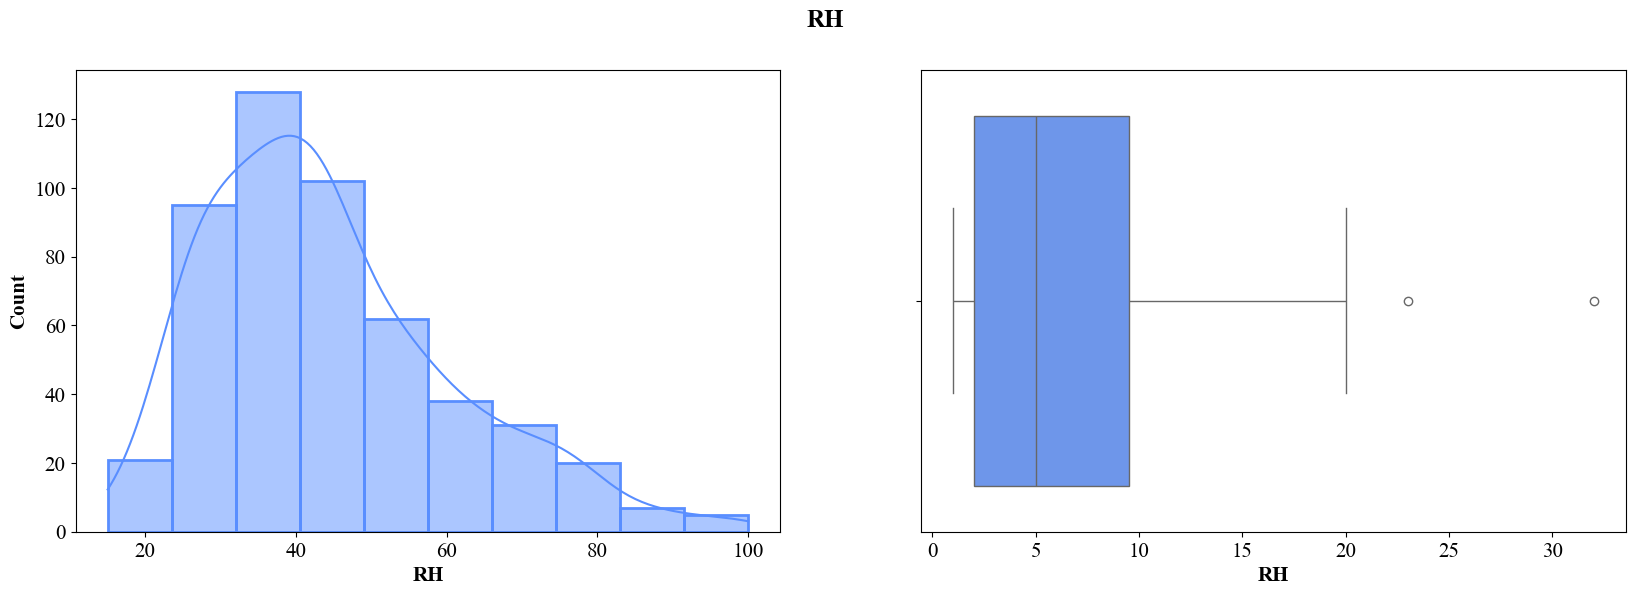

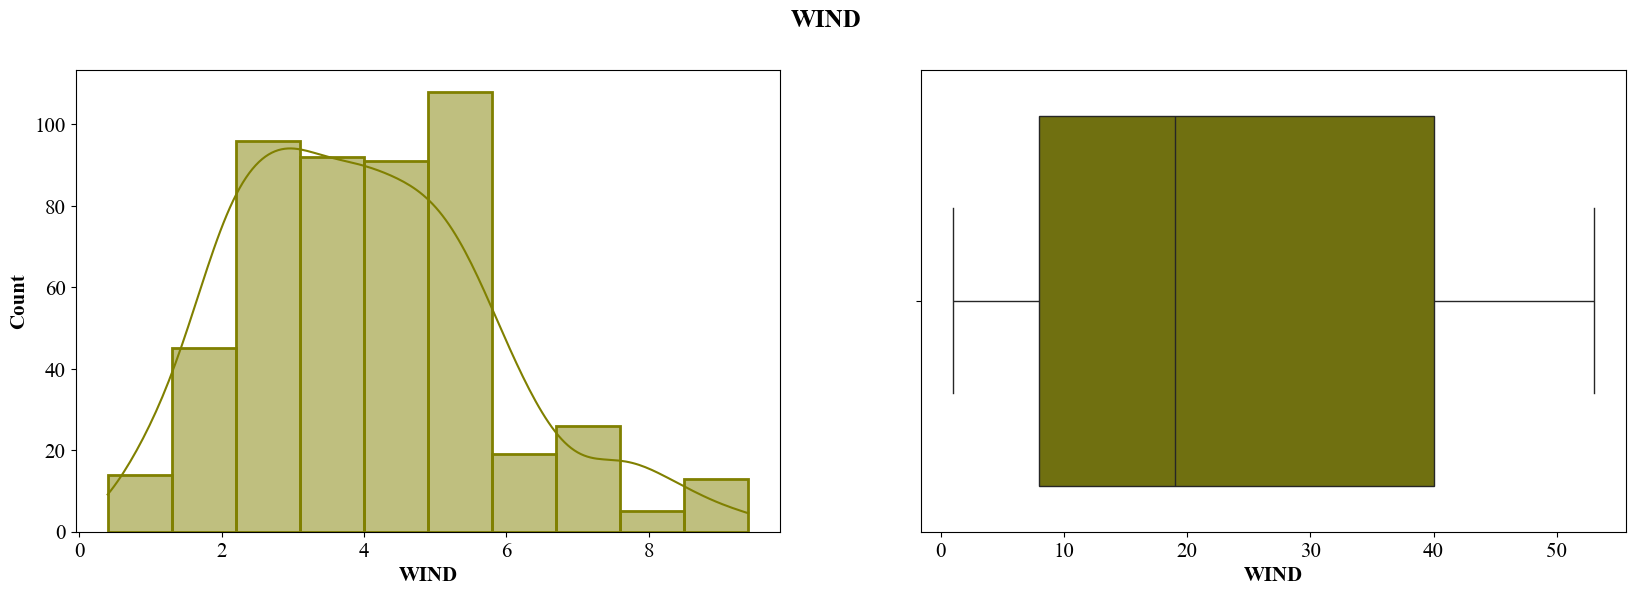

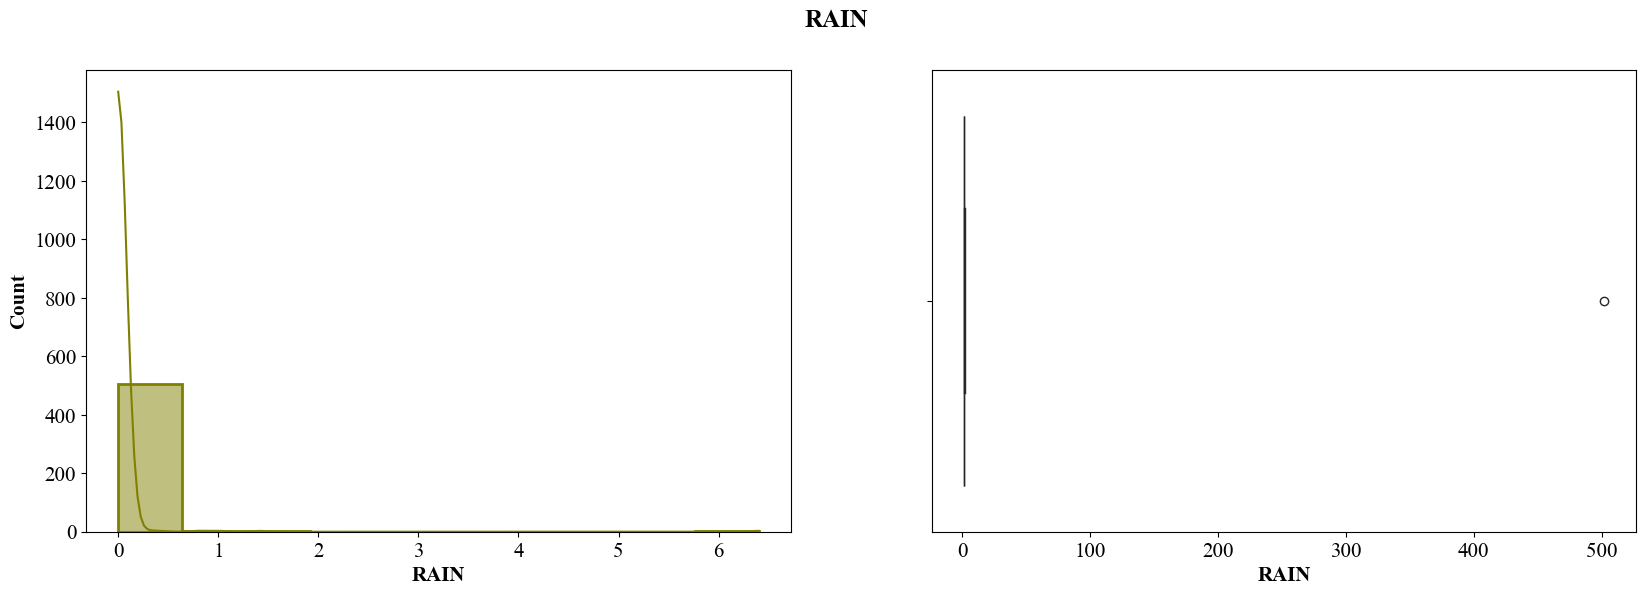

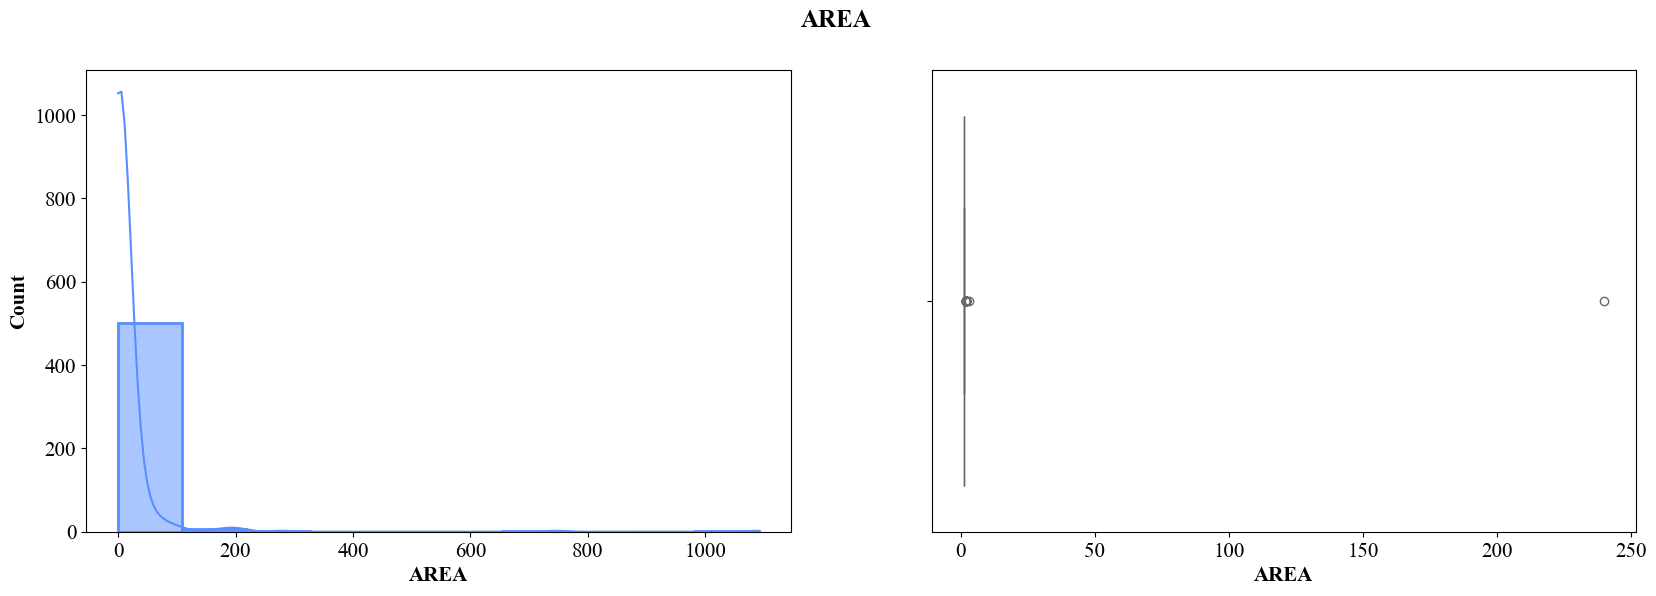

In [712]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in ff_data[numerical_cols]:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ff_data,cols)

#### ***Categorical Features*** ####

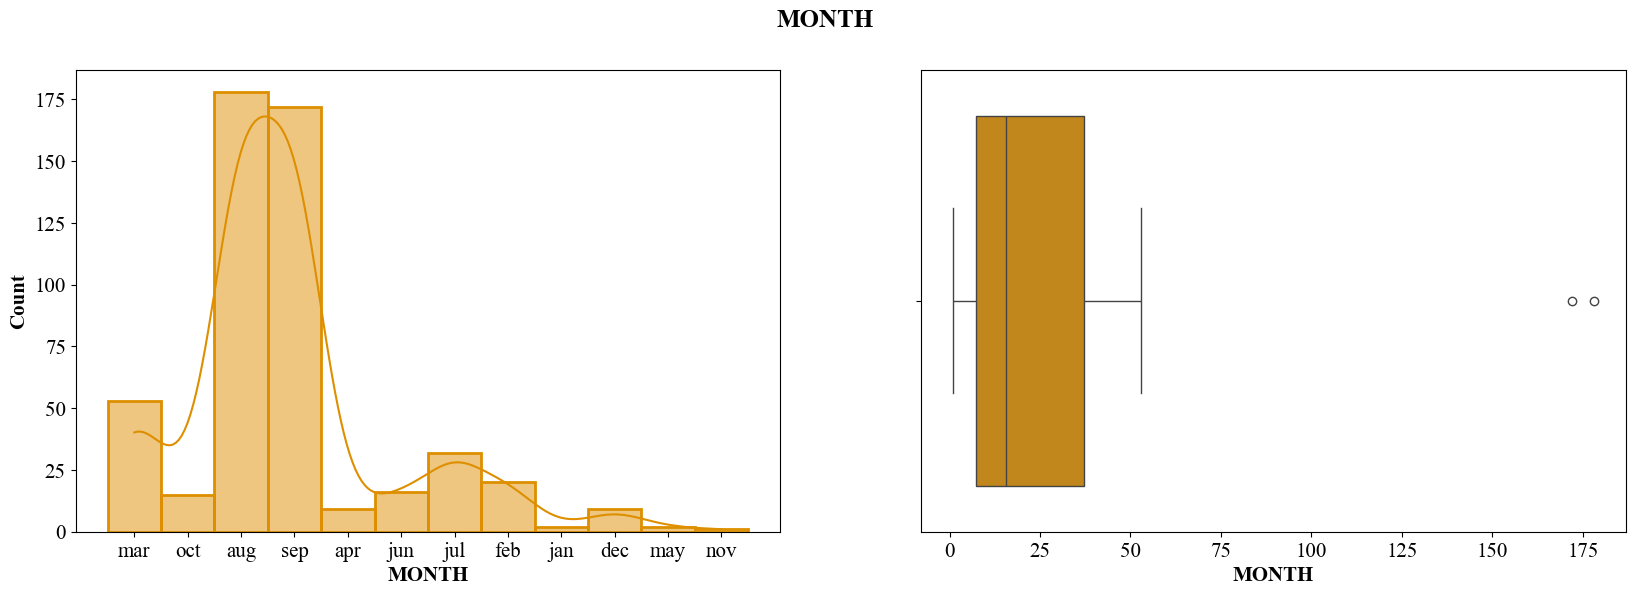

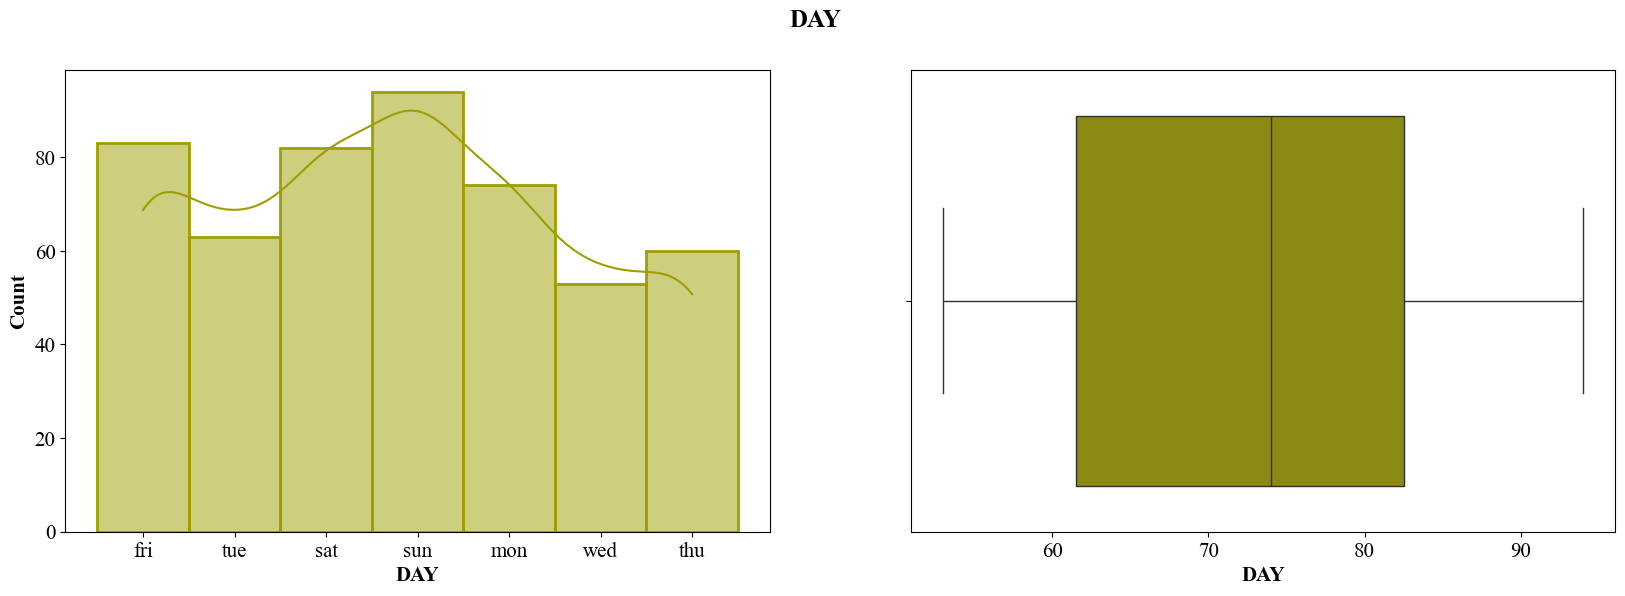

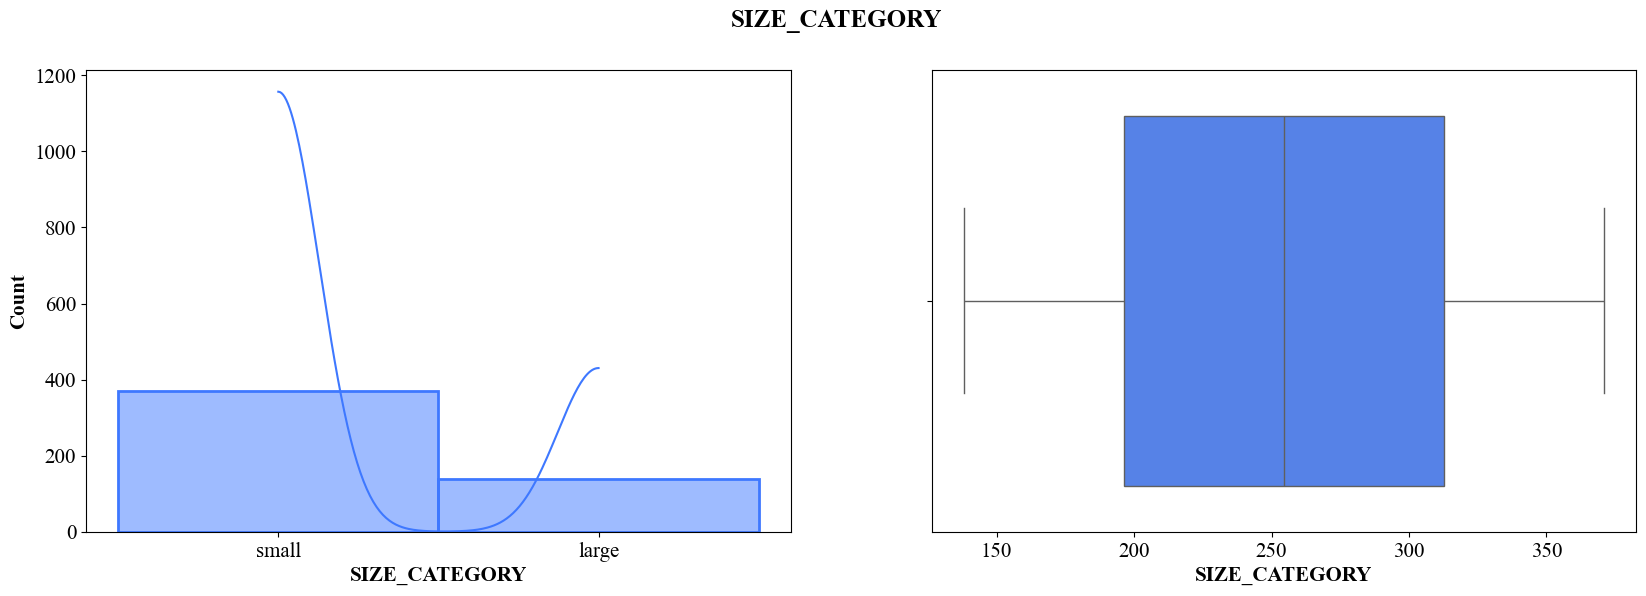

In [713]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in ff_data[categorical_cols]:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ff_data,cols)

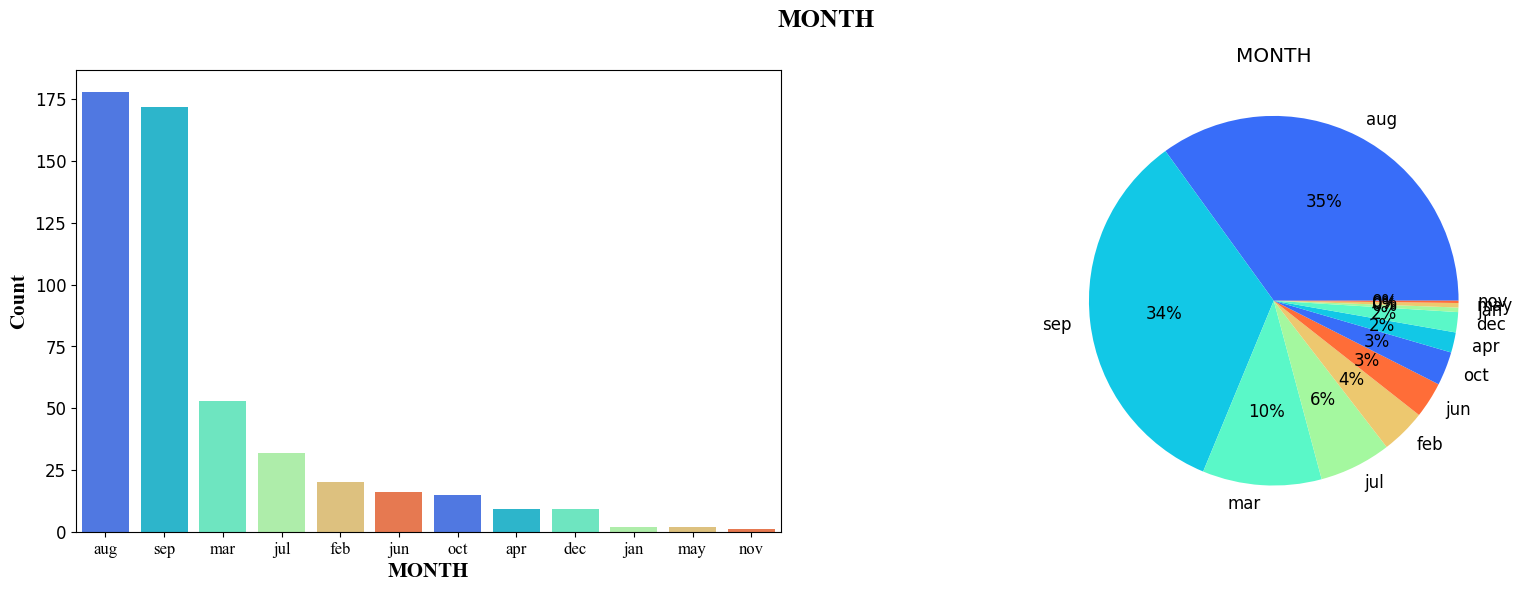

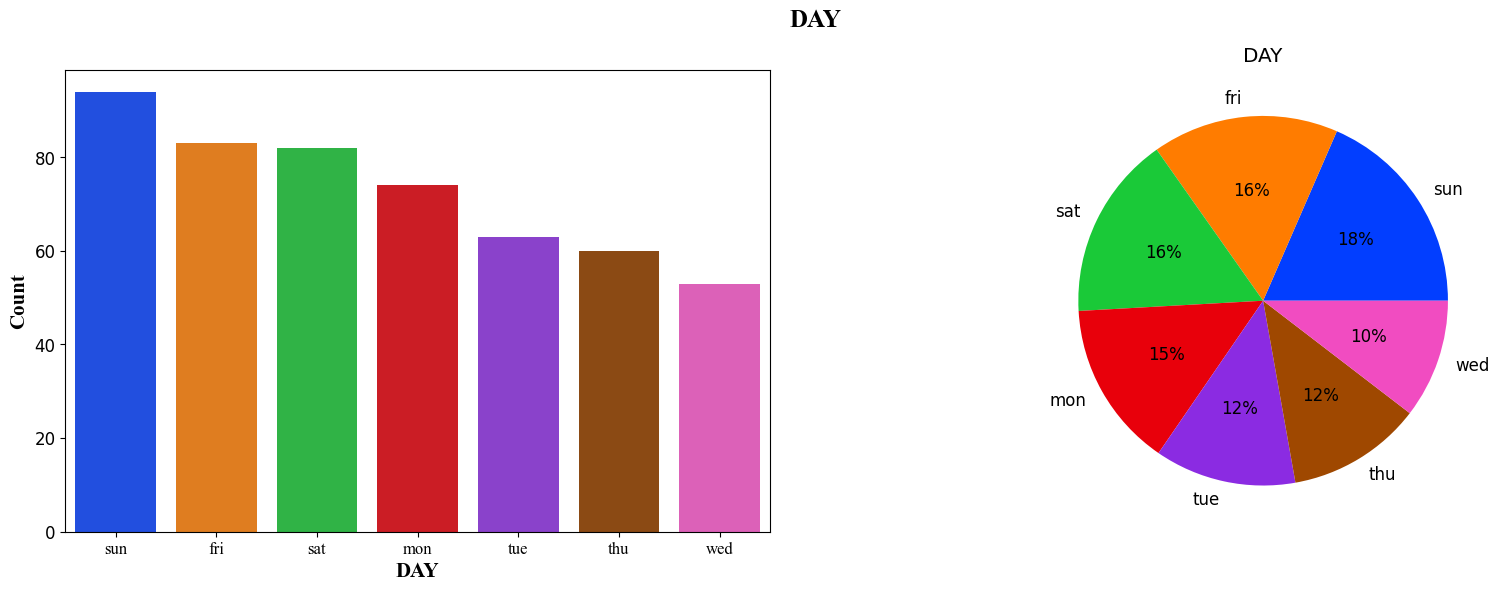

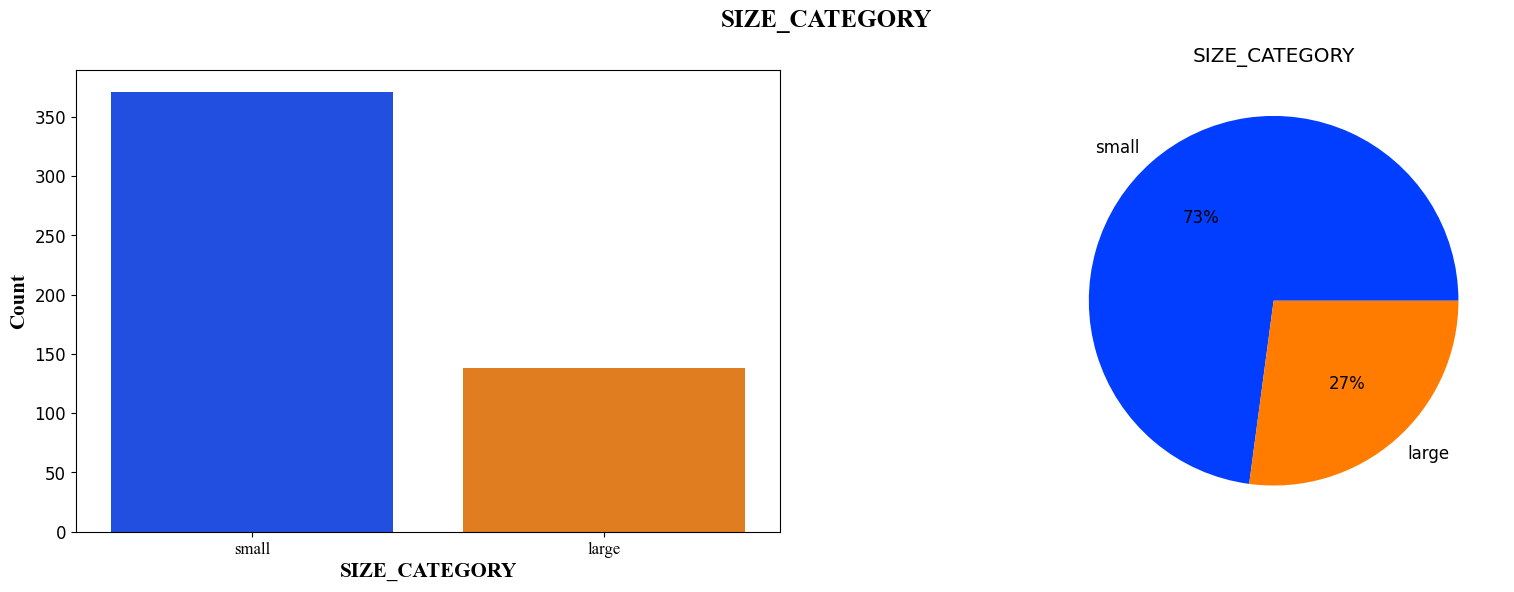

In [714]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

  
    # Display state data in a form of Pie Graph
    plt.subplot(1,2,2)
    values = data[feature].value_counts().keys().tolist()
    counts = data[feature].value_counts().tolist()
    plt.pie(data[feature].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman").set_fontsize('18')

for c_cols in ff_data[categorical_cols]:
    colors = ['bright','rainbow']
    color = random.choice(colors)
    plot_data(ff_data[categorical_cols],c_cols,color)
    plt.title(c_cols.upper())

In [715]:
# Showing features with more than one outlier

def get_outliers(data):
    
    outlier_indices = []
    for cols in data.columns.tolist():
        Q1 = np.percentile(data[cols], 25)  # 1st quartile (25%)
        Q3 = np.percentile(data[cols],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR            # outlier step
        
        # Getting the list of indices of features having outliers
        outlier_list_col = data[(data[cols] < Q1 - outlier_step) | (data[cols] > Q3 + outlier_step )].index
        
        # Adding the outlier indices for features to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print(f'The dataset contains {len(get_outliers(ff_data[numerical_cols]))} observations with more than 2 outliers') 

The dataset contains 5 observations with more than 2 outliers


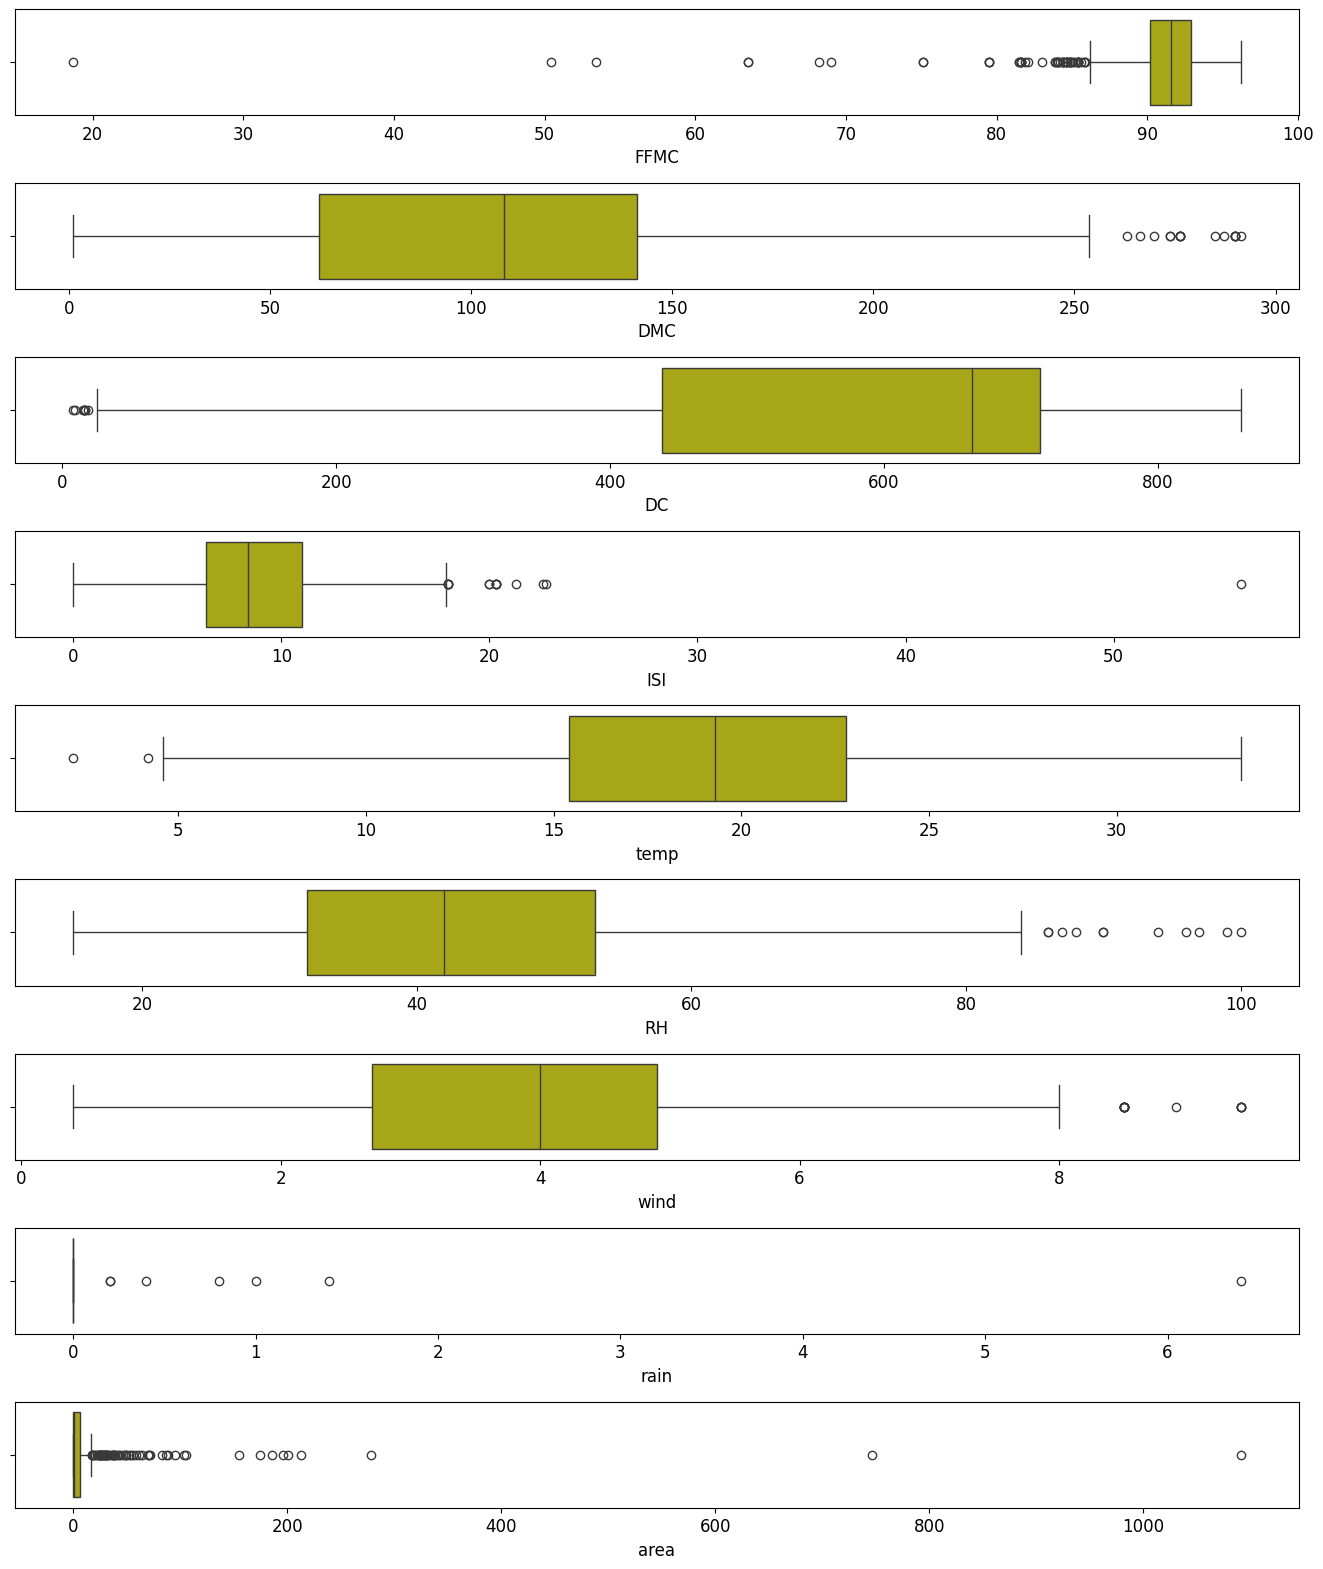

In [716]:
fig, axes=plt.subplots(9,1,figsize=(14,16),sharex=False,sharey=False)
plt.tight_layout(pad=2.0)
ax_cnt = 0
for cols in (ff_data[numerical_cols]):
    sns.boxplot(x=cols,data=ff_data,color='#bebe00',ax=axes[ax_cnt])
    ax_cnt +=1

##### **INFERENCE** #####
There are lot of outliers present in the dataframe but we should be dropping them because the numbers are large and may significantly affect the creation of the model

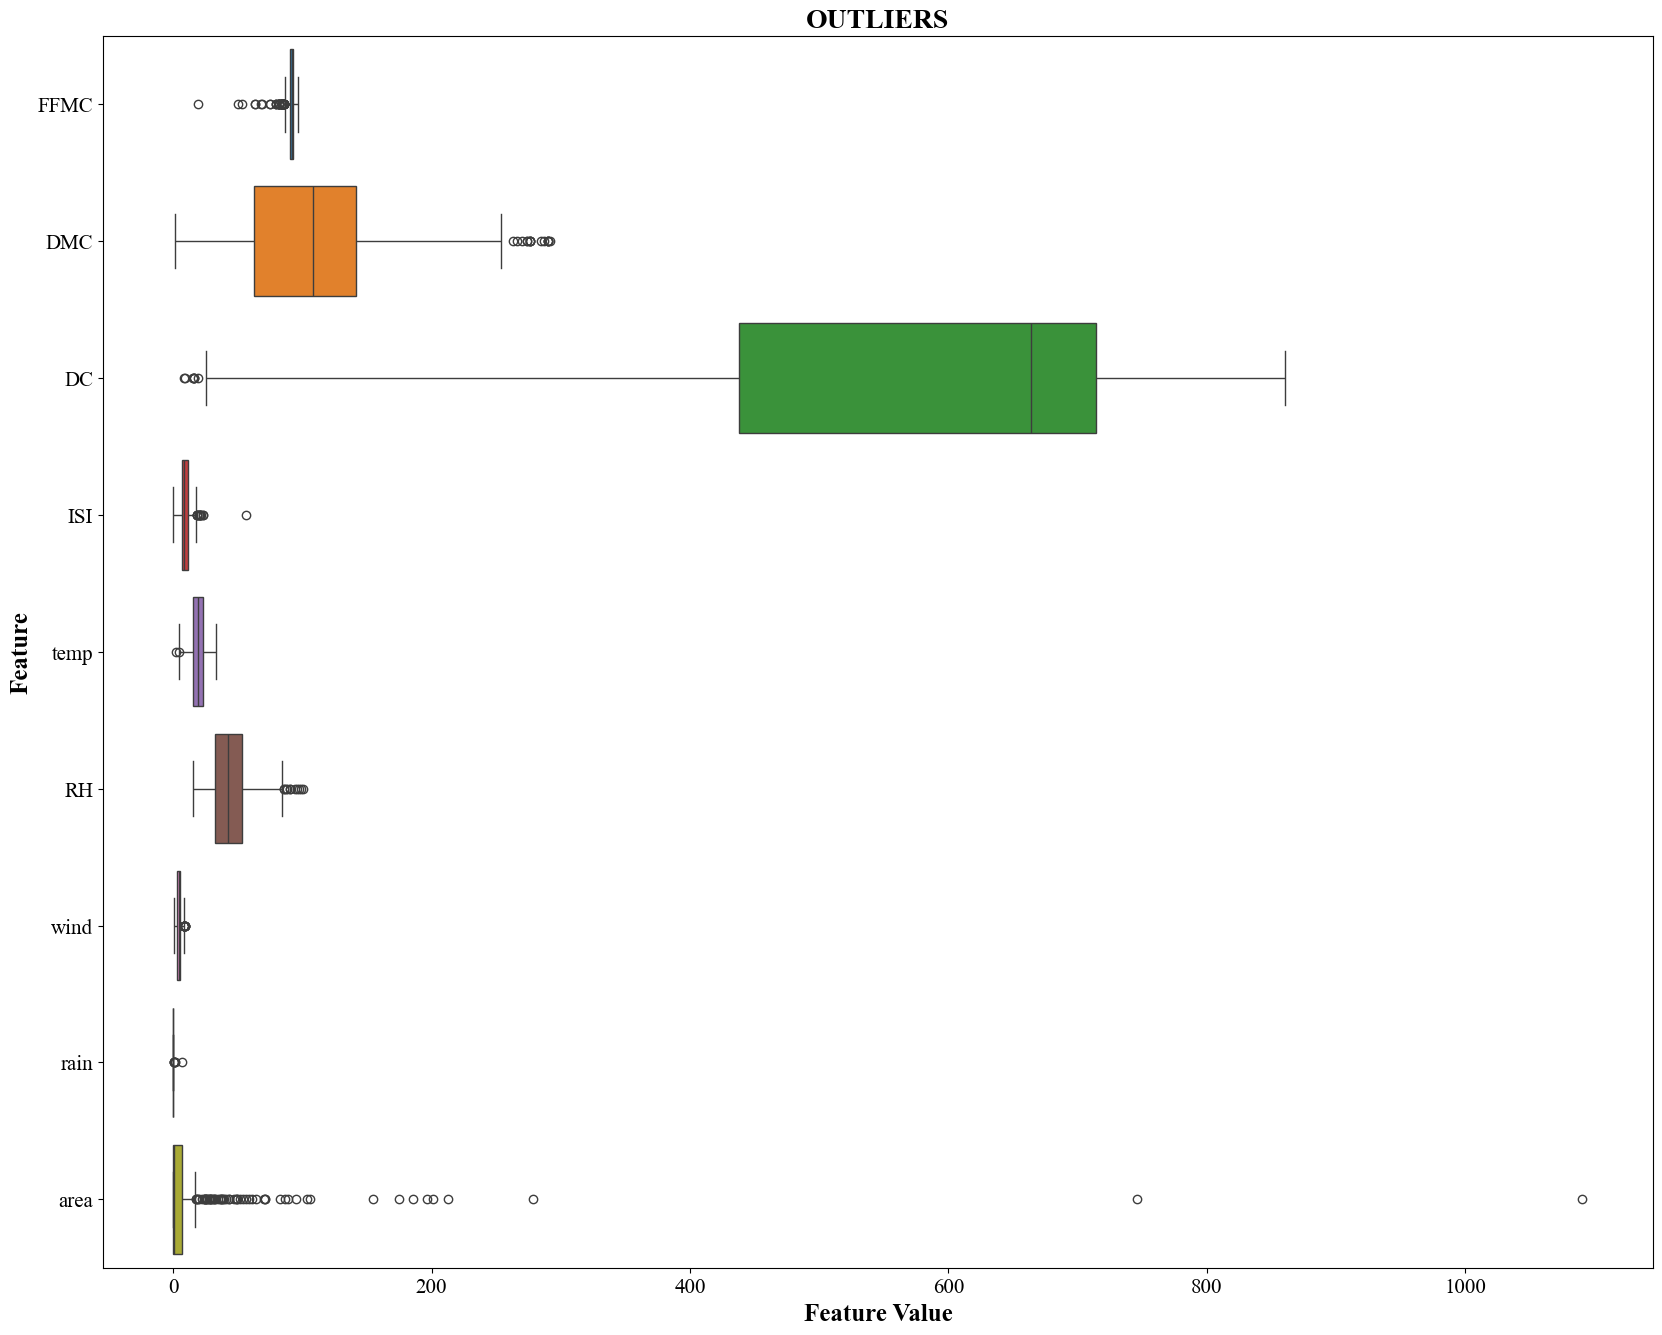

In [717]:

# Outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=ff_data[numerical_cols], orient="h")
plt.xlabel('Feature Value', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.ylabel('Feature', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.title('OUTLIERS', weight='bold', fontfamily = "Times New Roman", size = '20')
plt.show()

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


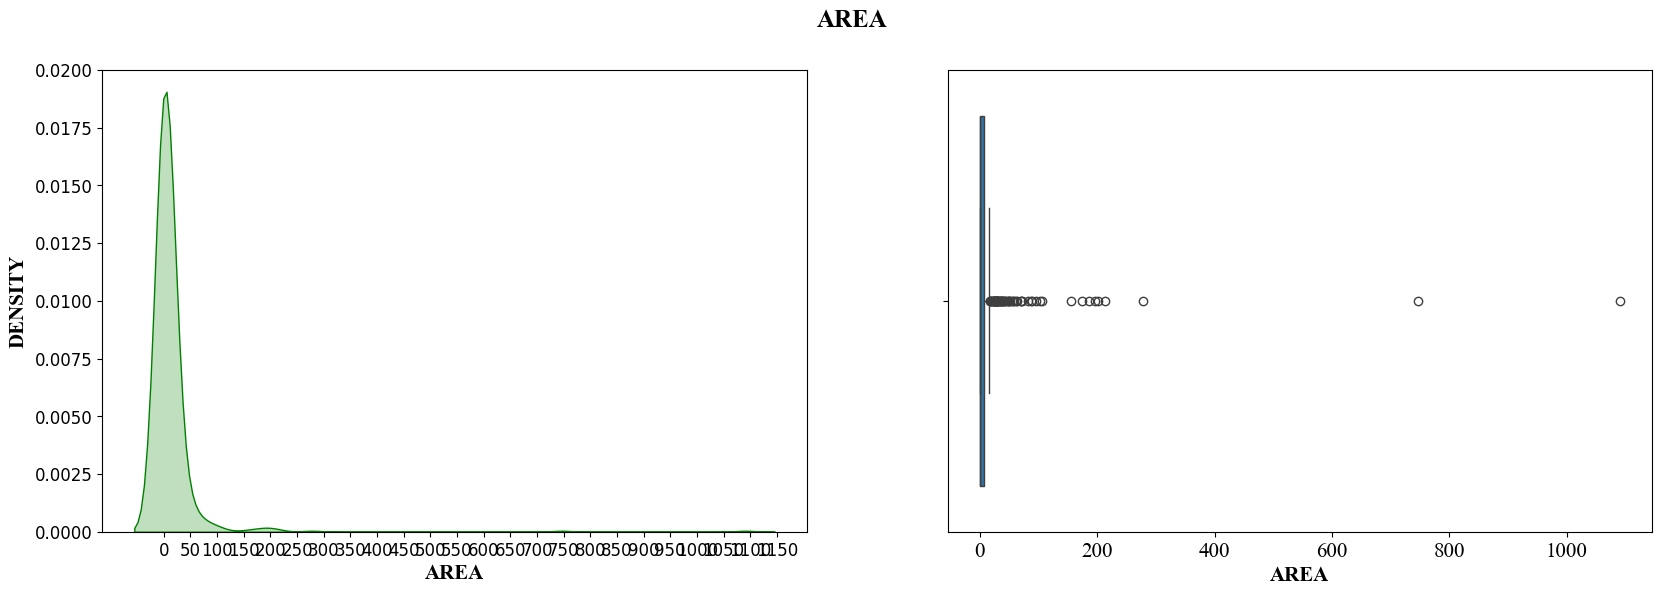

In [718]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
print("Skew: {}".format(ff_data['area'].skew()))
print("Kurtosis: {}".format(ff_data['area'].kurtosis()))
ax = sns.kdeplot(ff_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.ylabel('DENSITY', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.xlabel('AREA', weight='bold', fontfamily = "Times New Roman", size = '15')


#Display state data in a form of Pie Graph
plt.subplot(1,2,2)
sns.boxplot(data=ff_data['area'], orient="h")
plt.xlabel('AREA', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.suptitle('AREA', weight='bold', fontfamily = "Times New Roman", size = '18')

plt.show()

##### **INFERENCE** #####
- The data associated with 'area' is highly skewed with a value of +12.84 and huge kurtosis value of 194.
- The majority of forest fires are of less areas.

### **CORRELATION MATRIX** ###

In [719]:
ff_data[numerical_cols].corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


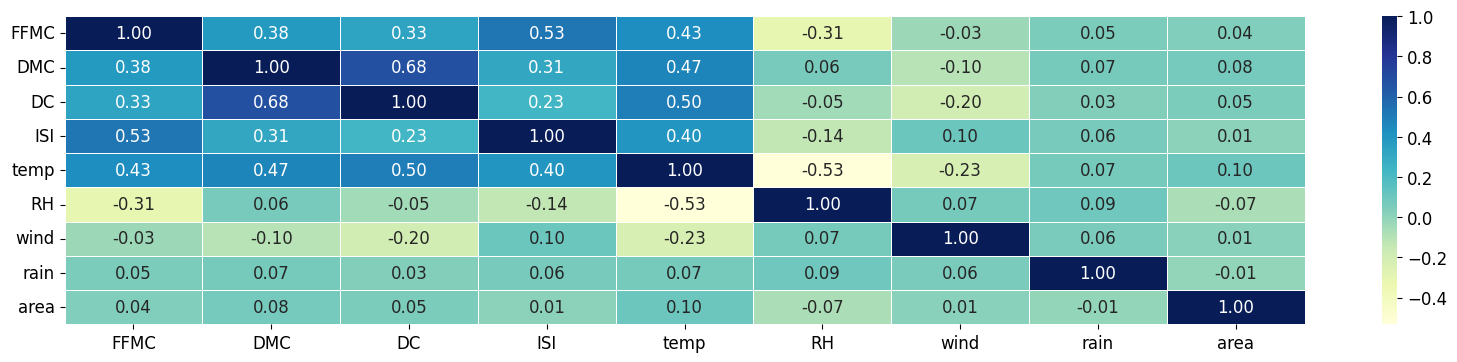

In [720]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(ff_data[numerical_cols].corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

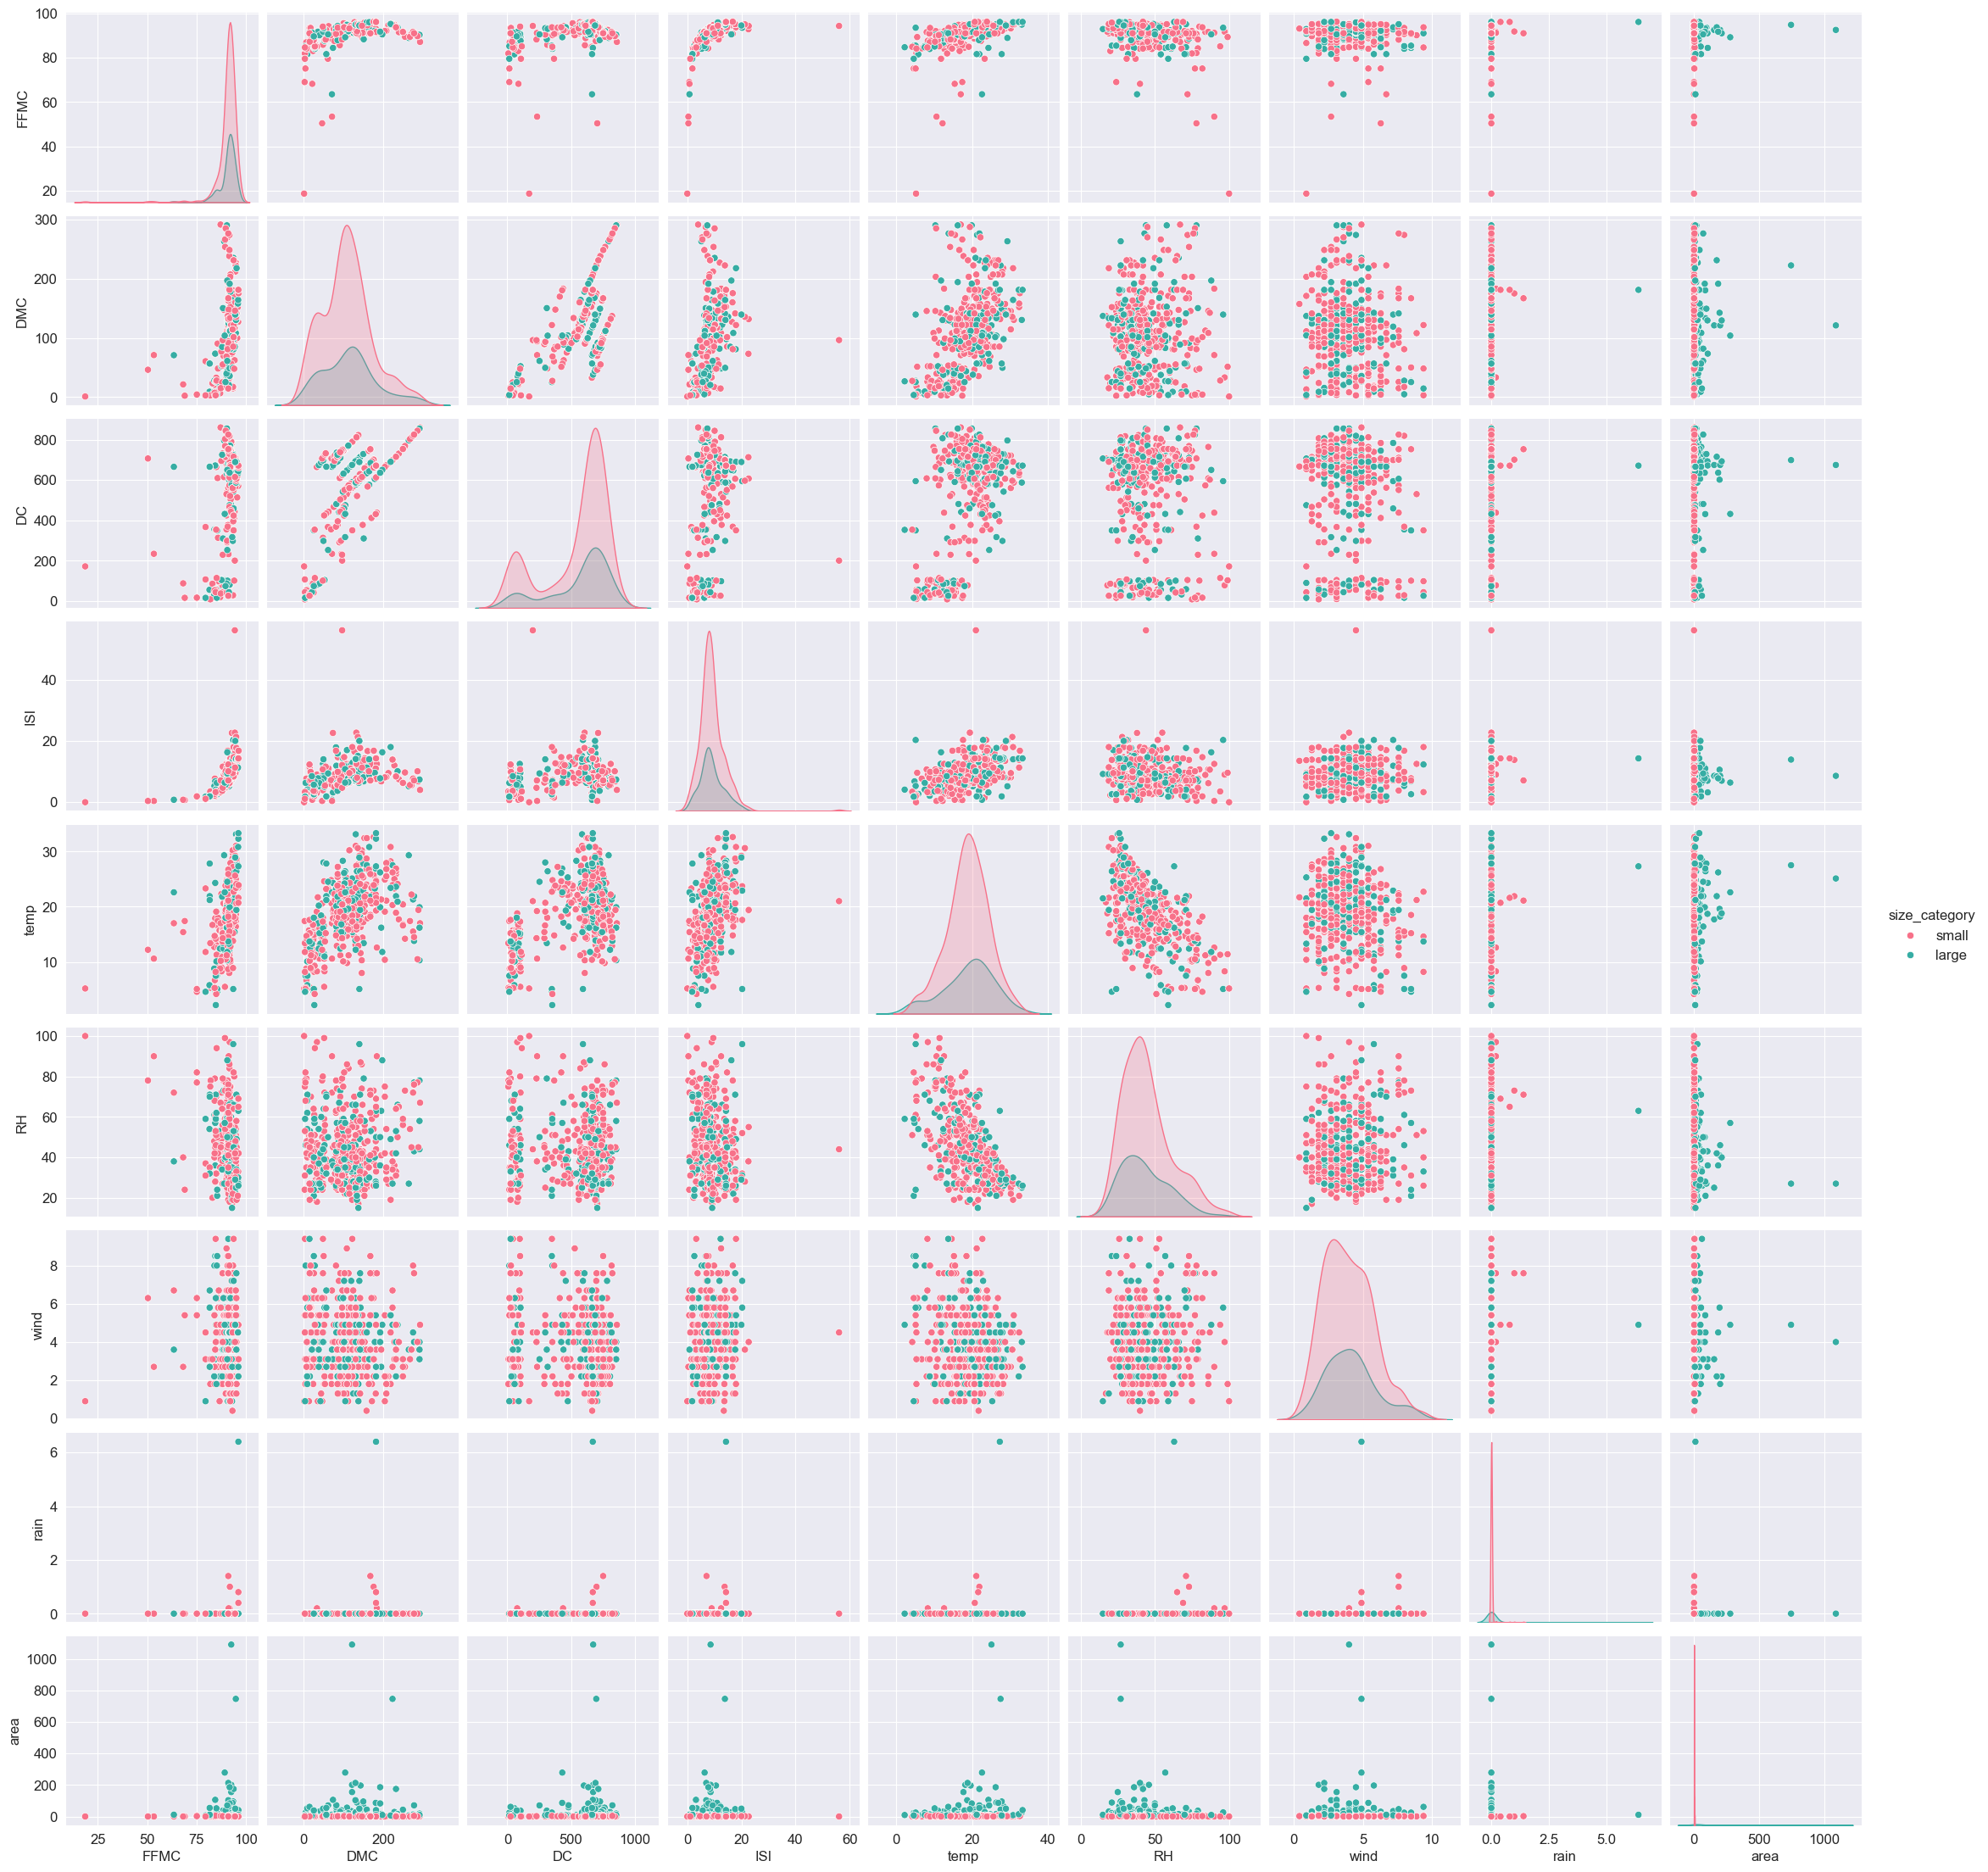

In [721]:
# Format the plot background and scatter plots for all the variables
corr_data = numeric_data
corr_data['size_category'] = ff_data['size_category']
import seaborn as sns
sns.set_style('darkgrid')
sns.pairplot(corr_data, hue='size_category', palette="husl")

In [722]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 39.9+ KB


In [723]:
le = LabelEncoder()
le.fit(ff_data["size_category"])
ff_data["size_category"]=le.transform(ff_data["size_category"])

### ***CHECKING CORRELATION*** ###

In [724]:
data_c = ff_orig_data.drop(['month','day','area','size_category'], axis=1)

In [725]:
data_c

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


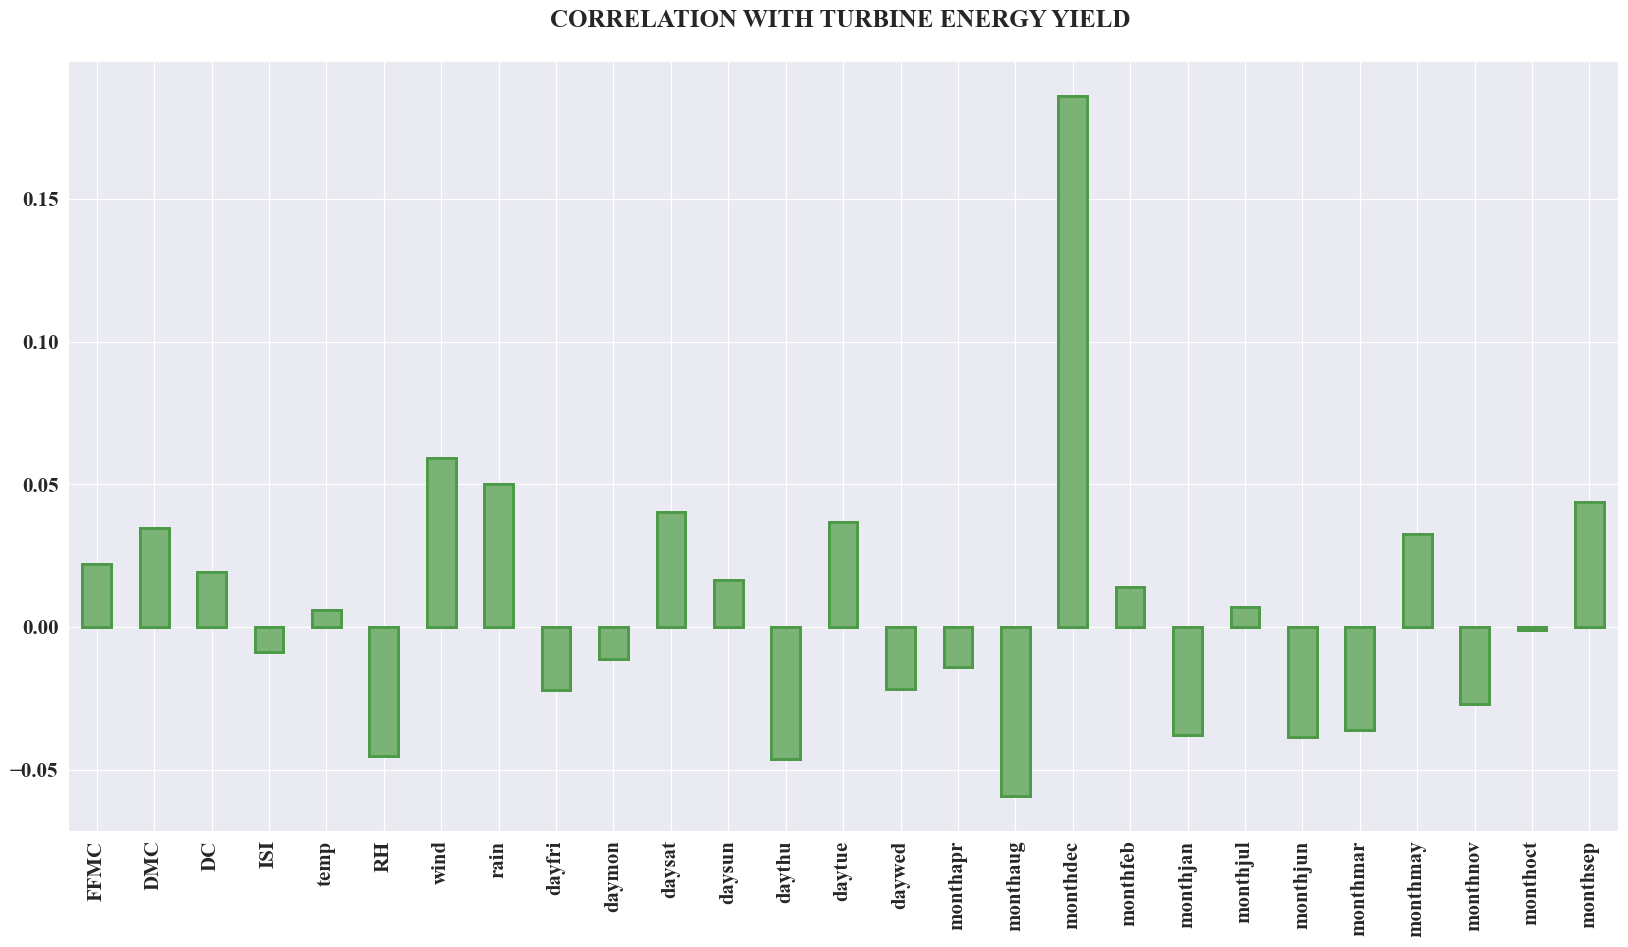

In [726]:
df=data_c.copy()
df['size_category'] = np.where(ff_orig_data['size_category'].str.contains("large"), 1, 0)
correlations = data_c.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=90)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.show()

## **Imbalanced Data** ##

In [727]:
fire_data = ff_data.drop(['month','day','area'], axis=1)

# Note: The column 'area' has the highest correlation of 15K and others are negligable so we will remove area for the time being from the original data to find the other significant columns.


In [728]:
fire_data.shape

(509, 28)

In [729]:
# Defining x and y attributes
inputs = fire_data.drop('size_category', axis=1)
target = fire_data['size_category']

### ***Categorizing the imbalanced data to Training and Testing Sets with testing sample size as 30%*** ###

In [730]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train_d,x_test_d,y_train_d,y_test_d = train_test_split(inputs,target,test_size=0.3,random_state=1,stratify=y)

In [731]:
print("Shape of x_train_d: ",x_train_d.shape)
print("Shape of x_test_d: ", x_test_d.shape)
print("Shape of y_train_d: ",y_train_d.shape)
print("Shape of y_test_d: ",y_test_d.shape)

Shape of x_train_d:  (356, 27)
Shape of x_test_d:  (153, 27)
Shape of y_train_d:  (356,)
Shape of y_test_d:  (153,)


In [732]:
# Summarizing train and test composition
from collections import Counter
counter_train_d = Counter(y_train_d)
counter_test_d = Counter(y_test_d)
print('Training Data',counter_train_d,'Testing Data',counter_test_d)

Training Data Counter({1: 259, 0: 97}) Testing Data Counter({1: 112, 0: 41})


### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [733]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

### **Training the Model SVM with default hyperparameters** ###

In [734]:
# Preparing a SVC model on training data set
from sklearn.svm import SVC
from sklearn import tree, preprocessing, metrics
model_d = SVC()
model_d.fit(x_train_d, y_train_d)

print_score(model_d, x_train_d, y_train_d, x_test_d, y_test_d, train=True)
print_score(model_d, x_train_d, y_train_d, x_test_d, y_test_d, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 72.75%

____________________________________________________________________

CLASSIFICATION REPORT:
              0           1  accuracy   macro avg  weighted avg
precision   0.0    0.727528  0.727528    0.363764      0.529297
recall      0.0    1.000000  0.727528    0.500000      0.727528
f1-score    0.0    0.842276  0.727528    0.421138      0.612780
support    97.0  259.000000  0.727528  356.000000    356.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[  0  97]
 [  0 259]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 73.20%

____________________________________________________________________

CLASSIFICATION REPORT:
              0           1  accurac

##### **INFERENCE** #####
- The best accuracy is for the default SVM model is 73.2%
- As a result of the imbalance in the target dataset,the results are biased towards the majority class.
- This will classify the target majority classes correctly but will fail to classify the target minority classes.
- We will need to use some kind of oversampling techniques to balance the dataset.

### **NORMALIZING THE DATA** ###

In [735]:
columns = fire_data.columns
columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'dayfri',
       'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr',
       'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun',
       'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [736]:
scaler = MinMaxScaler()
scaler.fit(fire_data)

MinMaxScaler()

In [802]:
f_data = pd.DataFrame()
f_data[columns] = scaler.transform(fire_data[columns])

In [738]:
f_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [739]:
x = f_data.drop(['size_category'],axis=1).copy()
y = f_data.size_category

In [740]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [741]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
504    0.0
505    0.0
506    0.0
507    1.0
508    1.0
Name: size_category, Length: 509, dtype: float64

### ***Categorizing the imbalanced data to Training and Testing Sets with testing sample size as 30%*** ###

In [742]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [743]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (356, 27)
Shape of x_test:  (153, 27)
Shape of y_train:  (356,)
Shape of y_test:  (153,)


In [744]:
# Summarizing train and test composition
from collections import Counter
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({1.0: 259, 0.0: 97}) Testing Data Counter({1.0: 112, 0.0: 41})


### **BALANCING THE DATA** ###

In [745]:
fire_data.size_category.value_counts()

size_category
1    371
0    138
Name: count, dtype: int64

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [746]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1.0: 259, 0.0: 97})
After Counter({0.0: 259, 1.0: 259})


In [747]:
y_train_sm.value_counts()
# After applying SMOTE, the counts have balanced for the training count of 378 records, which is 80% of the total 600 records.
# We now see that "Good: 0" and , "Low: 0" and "Risky: 1", all have the same count of records i.e., 378

size_category
0.0    259
1.0    259
Name: count, dtype: int64

### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [748]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({1.0: 259, 0.0: 97})
After Counter({1.0: 259, 0.0: 241})


### **Hybridization: SMOTE + Tomek Links** ###

In [749]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1.0: 259, 0.0: 97})
After Counter({0.0: 238, 1.0: 238})


### **Hybridization: SMOTE + ENN** ###

In [750]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({1.0: 259, 0.0: 97})
After Counter({0.0: 127, 1.0: 89})


### **Analyzing the Performance after Oversampling to Balance the target class** ###

#### ***Function to get all the necessary metrics*** ####

*Function to get - confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided*

In [751]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # # Calculating the ROC_AUC
    # from sklearn.tree import DecisionTreeClassifier
    # roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test)[:, 1])
    # print(f"ROC_AUC: {roc_auc_f}\n")
    # print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [752]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [753]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test)[:, 1])
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [754]:
model_params = {

    'SVC' : {
        'model' : SVC(probability=True),
        'params' :[ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
                  ]
    }
}

In [755]:
from sklearn.model_selection import RepeatedStratifiedKFold

output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = 10, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('\n\n\n','*'*60,' '*15,'\n')
        print(f'               {model.upper()} WITH {resam}')
        print('\n','*'*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))




 ************************************************************                 

               SVC WITH ACTUAL

 ************************************************************
____________________________________________________________

CONFUSION MATRIX
[[  2  39]
 [  5 107]]
____________________________________________________________

ACCURACY: 0.7124183006535948

ROC_AUC: 0.43706445993031356

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.29      0.05      0.08        41
         1.0       0.73      0.96      0.83       112

    accuracy                           0.71       153
   macro avg       0.51      0.50      0.46       153
weighted avg       0.61      0.71      0.63       153

------------------------------------------------------------
____________________________________________________________



 *

**As the results can be compared, the Hybridization technique using SMOTE_Tomek gave the best results with 98.6% accuracy and 100% ROC_AUC score we are going to use it further**

In [756]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1.0: 259, 0.0: 97})
After Counter({0.0: 238, 1.0: 238})


In [757]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=1, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0.0: 238, 1.0: 238})
After Counter({0.0: 167, 1.0: 166})
Shape of x_train:  (333, 27)
Shape of x_test:  (143, 27)
Shape of y_train:  (333,)
Shape of y_test (143,)


### **MACHINE LEARNING: CLASSIFICATION** ###

#### ***KERNEL TRICK*** ####
- Linear kernel
- Polynomial kernel
- Radial Basis Function (RBF) kernel
- Sigmoid kernel

#### ***Sklearn Support Vector Classifier Using Linear Kernel*** ####

In [758]:
# Creating the Linear model
model_linear = SVC(kernel='linear', probability=True)

# Fitting the model
model_linear.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [759]:
print_score(model_linear, x_train, y_train, x_test, y_test, train=True)
print_score(model_linear, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 64.86%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.645349    0.652174  0.648649    0.648761      0.648751
recall       0.664671    0.632530  0.648649    0.648600      0.648649
f1-score     0.654867    0.642202  0.648649    0.648535      0.648554
support    167.000000  166.000000  0.648649  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[111  56]
 [ 61 105]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 45.45%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [760]:
# Predictions
y_pred = model_linear.predict(x_test)
print(f'SVC Model using Linear Kernel accuracy score: {accuracy_score(y_test, y_pred)}')

SVC Model using Linear Kernel accuracy score: 0.45454545454545453


In [761]:
# Classification report
print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

         0.0       0.46      0.52      0.49        71
         1.0       0.45      0.39      0.42        72

    accuracy                           0.45       143
   macro avg       0.45      0.46      0.45       143
weighted avg       0.45      0.45      0.45       143



*Compare the train-set and test-set accuracy*

In [762]:
# Compare the train and test accuracy

print(f'Training set score: {model_linear.score(x_train, y_train)*100}%')
print(f'Test set score: {model_linear.score(x_test, y_test)*100}%')

Training set score: 64.86486486486487%
Test set score: 45.45454545454545%


*CONFUSION MATRIX*

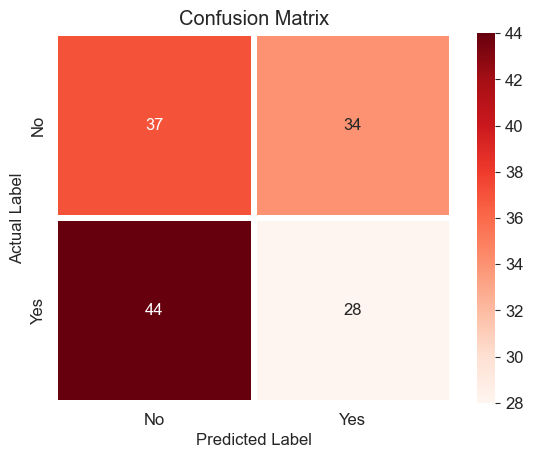

In [763]:
classnames = ['No','Yes']
confusionmatrix = confusion_matrix(y_test,model_linear.predict(x_test))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

*ROC-AUC*

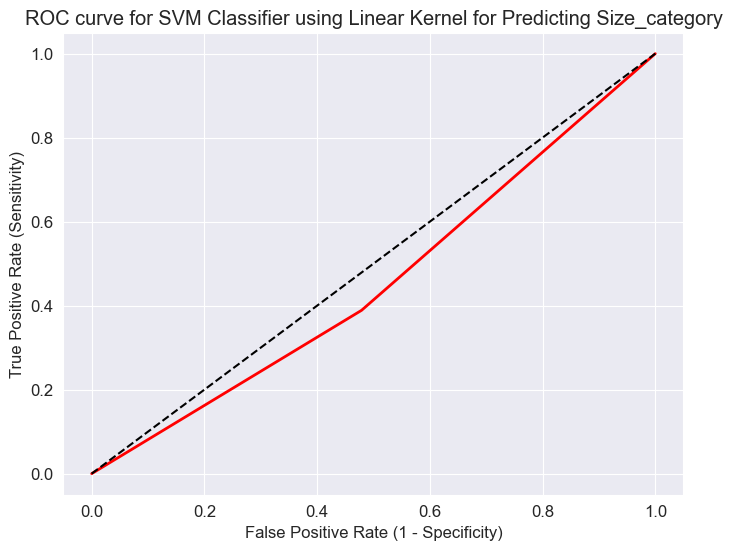

ROC AUC : 0.4550


In [764]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

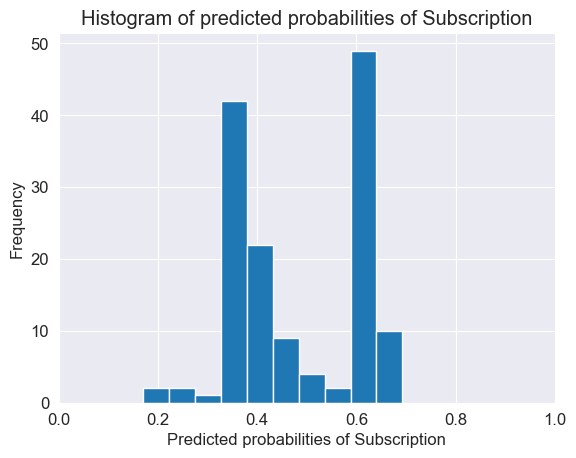

In [765]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model_linear.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

#### **INFERENCE** ####
- The first column tell us that there are approximately 73 observations with probability between 0.0 and 0.1 that the size of the fire will be small.
- There are almost equal amount number of observations for probability greater than and less than 0.5.
- Majority of observations predict that the Forest Fire size will be small.

In [766]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.45500782472613455


**Comments**

- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier doesn't do a good job in predicting whether it will or small or large size of fire

#### ***Sklearn Support Vector Classifier Using Polynomial Kernel*** ####

In [767]:
# Creating the Linear model
model_poly = SVC(kernel='poly', probability=True)

# Fitting the model
model_poly.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [768]:
print_score(model_poly, x_train, y_train, x_test, y_test, train=True)
print_score(model_poly, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 74.47%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.738372    0.751553  0.744745    0.744962      0.744943
recall       0.760479    0.728916  0.744745    0.744697      0.744745
f1-score     0.749263    0.740061  0.744745    0.744662      0.744676
support    167.000000  166.000000  0.744745  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[127  40]
 [ 45 121]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 59.44%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [769]:
# Predictions
y_pred = model_poly.predict(x_test)
print(f'SVC Model using Polynomial Kernel accuracy score: {accuracy_score(y_test, y_pred)}')

SVC Model using Polynomial Kernel accuracy score: 0.5944055944055944


In [770]:
# Classification report
print('SVM Polynomial Kernel Model','\n',report(y_test, y_pred))

SVM Polynomial Kernel Model 
               precision    recall  f1-score   support

         0.0       0.59      0.62      0.60        71
         1.0       0.60      0.57      0.59        72

    accuracy                           0.59       143
   macro avg       0.59      0.59      0.59       143
weighted avg       0.59      0.59      0.59       143



*Compare the train-set and test-set accuracy*

In [771]:
# Compare the train and test accuracy

print(f'Training set score: {model_poly.score(x_train, y_train)*100}%')
print(f'Test set score: {model_poly.score(x_test, y_test)*100}%')

Training set score: 74.47447447447448%
Test set score: 59.44055944055944%


*CONFUSION MATRIX*

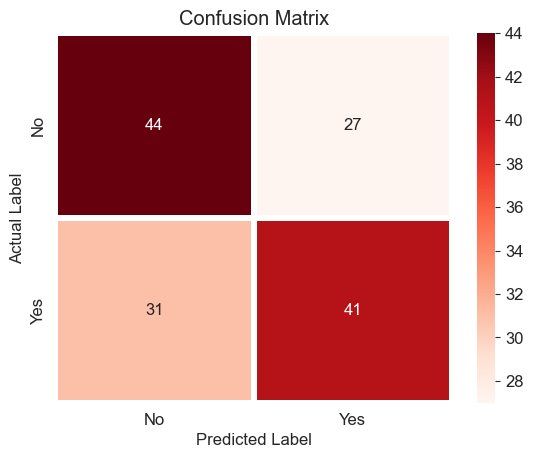

In [772]:
classnames = ['No','Yes']
confusionmatrix = confusion_matrix(y_test,model_poly.predict(x_test))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

*ROC-AUC*

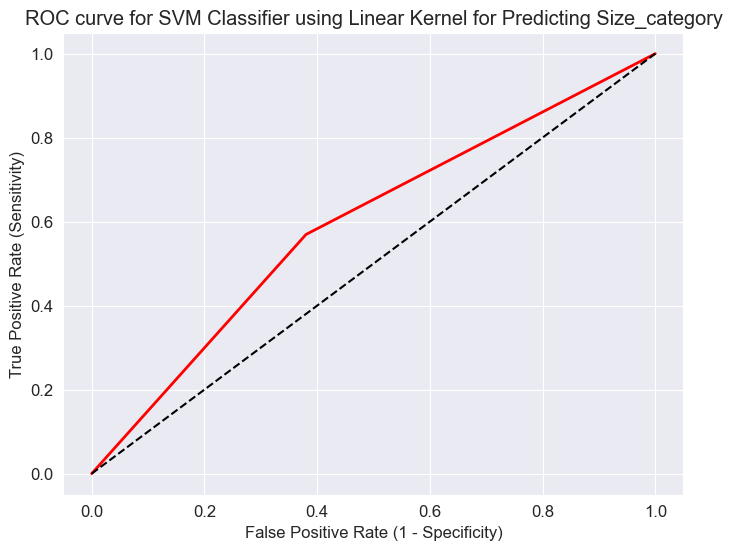

ROC AUC : 0.5946


In [773]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

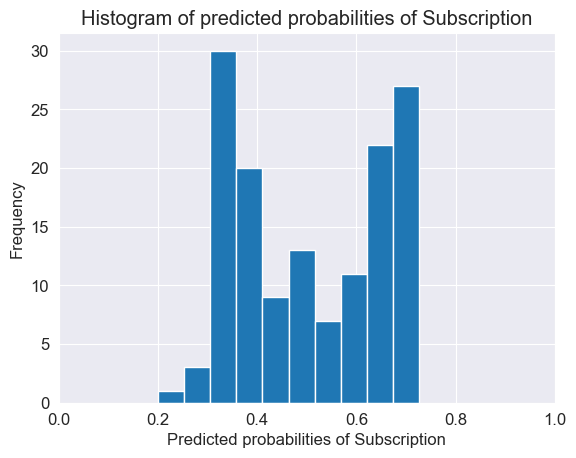

In [774]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model_poly.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [775]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.5945813771517997


#### ***Sklearn Support Vector Classifier Using RBF Kernel*** ####

In [776]:
# Creating the Linear model
model_rbf = SVC(kernel='rbf', probability=True)

# Fitting the model
model_rbf.fit(x_train, y_train)

SVC(probability=True)

In [777]:
print_score(model_rbf, x_train, y_train, x_test, y_test, train=True)
print_score(model_rbf, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 70.87%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.708333    0.709091  0.708709    0.708712      0.708711
recall       0.712575    0.704819  0.708709    0.708697      0.708709
f1-score     0.710448    0.706949  0.708709    0.708698      0.708703
support    167.000000  166.000000  0.708709  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[119  48]
 [ 49 117]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 55.94%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [778]:
# Predictions
y_pred = model_rbf.predict(x_test)
print(f'SVC Model using RBF Kernel accuracy score: {accuracy_score(y_test, y_pred)}')

SVC Model using RBF Kernel accuracy score: 0.5594405594405595


In [779]:
# Classification report
print('SVM RBF Kernel Model','\n',report(y_test, y_pred))

SVM RBF Kernel Model 
               precision    recall  f1-score   support

         0.0       0.55      0.62      0.58        71
         1.0       0.57      0.50      0.53        72

    accuracy                           0.56       143
   macro avg       0.56      0.56      0.56       143
weighted avg       0.56      0.56      0.56       143



*Compare the train-set and test-set accuracy*

In [780]:
# Compare the train and test accuracy

print(f'Training set score: {model_rbf.score(x_train, y_train)*100}%')
print(f'Test set score: {model_rbf.score(x_test, y_test)*100}%')

Training set score: 70.87087087087087%
Test set score: 55.94405594405595%


*CONFUSION MATRIX*

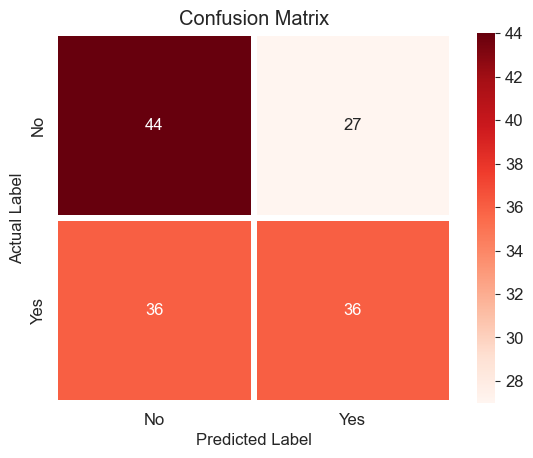

In [781]:
classnames = ['No','Yes']
confusionmatrix = confusion_matrix(y_test,model_rbf.predict(x_test))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

*ROC-AUC*

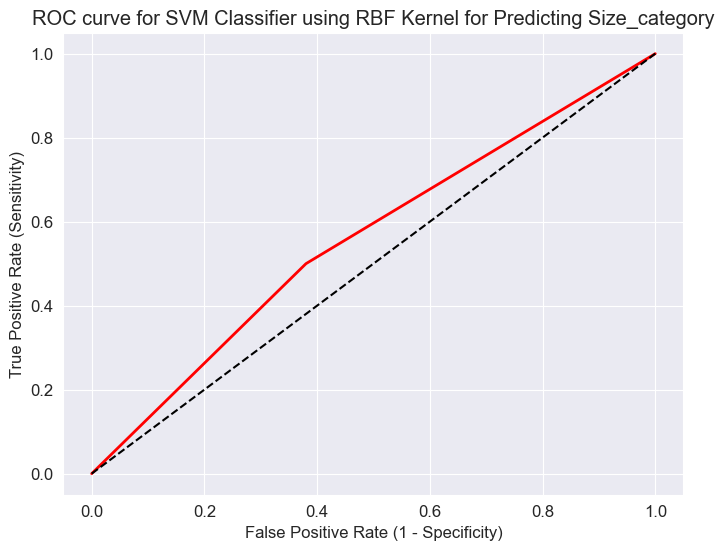

ROC AUC : 0.5599


In [782]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

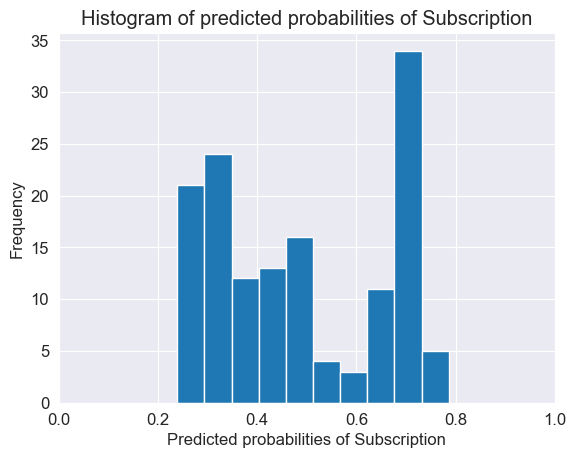

In [783]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model_rbf.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [784]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.5598591549295775


#### ***Sklearn Support Vector Classifier Using Sigmoid Kernel*** ####

In [785]:
# Creating the Linear model
model_sigmoid = SVC(kernel='sigmoid', probability=True)

# Fitting the model
model_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [786]:
print_score(model_sigmoid, x_train, y_train, x_test, y_test, train=True)
print_score(model_sigmoid, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 60.06%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.585859    0.622222  0.600601    0.604040      0.603986
recall       0.694611    0.506024  0.600601    0.600317      0.600601
f1-score     0.635616    0.558140  0.600601    0.596878      0.596994
support    167.000000  166.000000  0.600601  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[116  51]
 [ 82  84]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 42.66%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [787]:
# Predictions
y_pred = model_sigmoid.predict(x_test)
print(f'SVC Model using Linear Kernel accuracy score: {accuracy_score(y_test, y_pred)}')

SVC Model using Linear Kernel accuracy score: 0.42657342657342656


In [788]:
# Classification report
print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

         0.0       0.44      0.55      0.49        71
         1.0       0.41      0.31      0.35        72

    accuracy                           0.43       143
   macro avg       0.42      0.43      0.42       143
weighted avg       0.42      0.43      0.42       143



*Compare the train-set and test-set accuracy*

In [789]:
# Compare the train and test accuracy

print(f'Training set score: {model_sigmoid.score(x_train, y_train)*100}%')
print(f'Test set score: {model_sigmoid.score(x_test, y_test)*100}%')

Training set score: 60.06006006006006%
Test set score: 42.65734265734265%


*CONFUSION MATRIX*

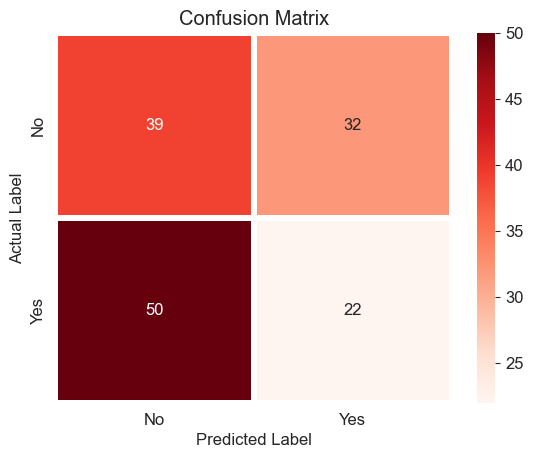

In [790]:
classnames = ['No','Yes']
confusionmatrix = confusion_matrix(y_test,model_sigmoid.predict(x_test))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

*ROC-AUC*

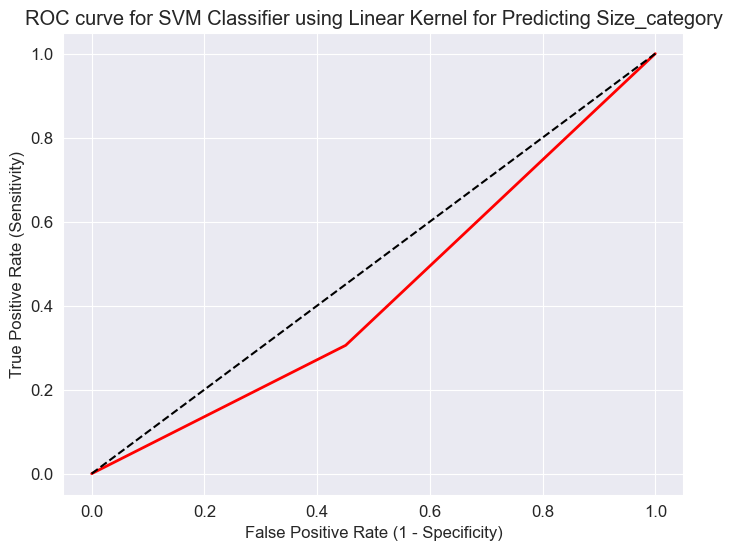

ROC AUC : 0.4274


In [791]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

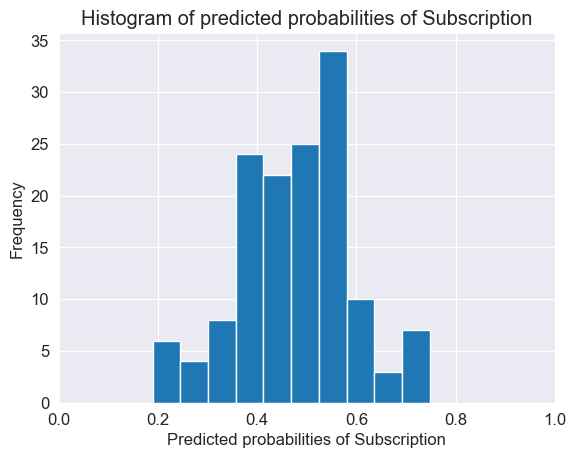

In [792]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model_sigmoid.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [793]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.4274256651017214


### **HYPERPARAMETER TUNING TO IMPROVE ACCURACY** ###

In [794]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(x_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.7802139037433156

In [795]:
gsSVMC.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.001}

In [796]:
print_score(svm_best, x_train, y_train, x_test, y_test, train=True)
print_score(svm_best, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 95.20%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.936416    0.968750  0.951952    0.952583      0.952535
recall       0.970060    0.933735  0.951952    0.951897      0.951952
f1-score     0.952941    0.950920  0.951952    0.951931      0.951934
support    167.000000  166.000000  0.951952  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[162   5]
 [ 11 155]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 70.63%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [797]:
predict_results = svm_best.predict(x_test)
np.mean(predict_results==y_test)

0.7062937062937062

In [798]:

# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.001,0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [799]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7863


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.6, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.6)


In [800]:
print_score(grid_search, x_train, y_train, x_test, y_test, train=True)
print_score(grid_search, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 94.29%

____________________________________________________________________

CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.935294    0.950920  0.942943    0.943107      0.943084
recall       0.952096    0.933735  0.942943    0.942915      0.942943
f1-score     0.943620    0.942249  0.942943    0.942935      0.942937
support    167.000000  166.000000  0.942943  333.000000    333.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[159   8]
 [ 11 155]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 69.23%

____________________________________________________________________

CLASSIFICATION REPORT:
      

In [801]:

# calculate GridSearch CV score on test set

print(f'GridSearch CV score on test set: {grid_search.score(x_test, y_test)}')

GridSearch CV score on test set: 0.6923076923076923


##### **INFERENCE** #####

The best model is the 'rbf' kernel
